In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
!pip install ipypb
from ipypb import ipb

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 데이터 로드

In [ ]:
onlinesales = pd.read_csv('Onlinesales_info.csv')
marketing = pd.read_csv('Marketing_info.csv')
tax = pd.read_csv('Tax_info.csv')
customer = pd.read_csv('Customer_info.csv')
discount = pd.read_csv('Discount_info.csv')

In [ ]:
print(f"<고객 데이터>\n{customer.isnull().sum()}\n")
print(f"<할인 데이터>\n{discount.isnull().sum()}\n")
print(f"<마케팅 데이터>\n{marketing.isnull().sum()}\n")
print(f"<온라인 판매 데이터>\n{onlinesales.isnull().sum()}\n")
print(f"<세금 데이터>\n{tax.isnull().sum()}\n")

<고객 데이터>
고객ID    0
성별      0
고객지역    0
가입기간    0
dtype: int64

<할인 데이터>
월         0
제품카테고리    0
쿠폰코드      0
할인율       0
dtype: int64

<마케팅 데이터>
날짜        0
오프라인비용    0
온라인비용     0
dtype: int64

<온라인 판매 데이터>
고객ID      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
dtype: int64

<세금 데이터>
제품카테고리    0
GST       0
dtype: int64



In [ ]:
print(customer.shape)
print(discount.shape)
print(marketing.shape)
print(onlinesales.shape)
print(tax.shape)

(1468, 4)
(204, 4)
(365, 3)
(52924, 9)
(20, 2)


1. 월별 판매액: 5월이 최저치이고 12월이 최고치이며, 특별한 구매패턴을 보이지 않습니다.

2. 고객 성별: 여성 고객은 934명으로, 전체 고객 중 남성보다 더 많은 비율을 차지합니다.

3. 제품 카테고리별 거래 횟수 및 수량: 가장 많은 거래 횟수는 Apparel 카테고리로 18,126건이며, 가장 많은 수량은 Office 카테고리로 88,383개입니다.

4. 고객 지역: California(464명), Chicago(456명), New York(324명), New Jersey(149명), Washington DC(75명) 순으로, California와 Chicago 지역에 전체 고객 중 약 60% 이상이 거주합니다.

5. 마케팅 비용: 오프라인 비용은 약 1,401,165,000원, 온라인 비용은 약 939,122,734.5원으로, 약 6:4 비율을 보입니다. 매출과 비례하는 데이터를 보여 2019년 마케팅이 효율적이라고 판단할 수 있습니다.

## Onlinesales_info EDA

In [ ]:
onlinesales.describe()

,수량,평균금액,배송료
count,52924.000000,52924.000000,52924.000000
mean,4.497638,52.237646,10.517630
std,20.104711,64.006882,19.475613
min,1.000000,0.390000,0.000000
25%,1.000000,5.700000,6.000000
50%,1.000000,16.990000,6.000000
75%,2.000000,102.130000,6.500000
max,900.000000,355.740000,521.360000


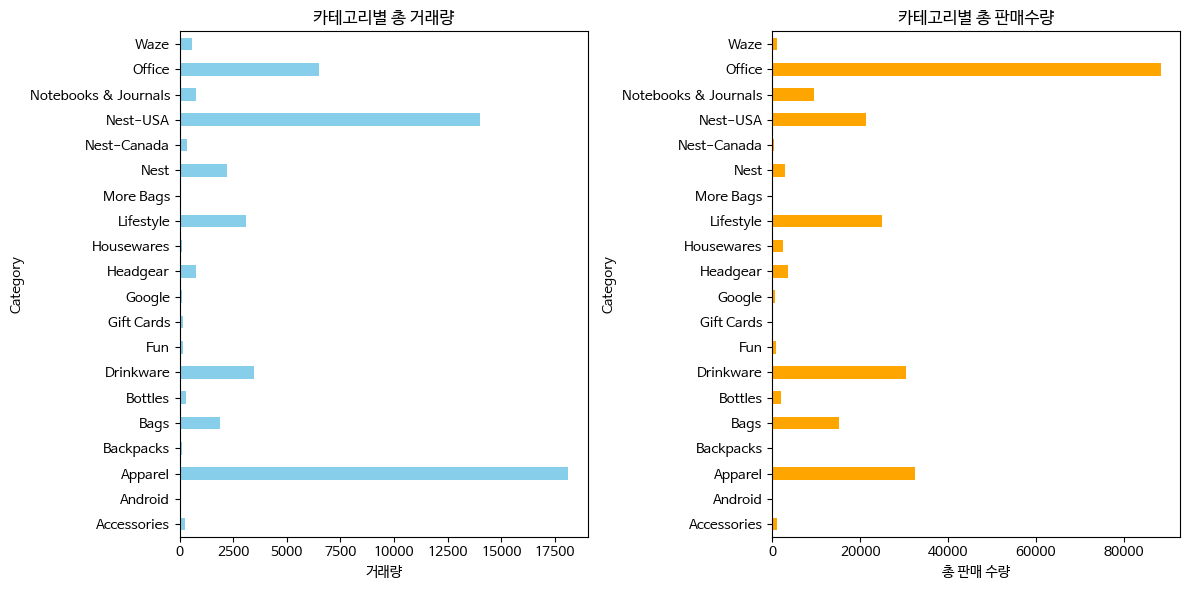

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 제품 카테고리별 거래 수 그래프
onlinesales.groupby('제품카테고리').size().plot(kind='barh', ax=axs[0], color='skyblue')
plt.rc('font', family='NanumBarunGothic')
axs[0].set_title('카테고리별 총 거래량')
axs[0].set_xlabel('거래량')
axs[0].set_ylabel('Category')

# 제품 카테고리별 판매수 그래프
onlinesales.groupby('제품카테고리')['수량'].sum().plot(kind='barh', ax=axs[1], color='orange')
plt.rc('font', family='NanumBarunGothic')
axs[1].set_title('카테고리별 총 판매수량')
axs[1].set_xlabel('총 판매 수량')
axs[1].set_ylabel('Category')

plt.tight_layout()
plt.show()

- 가장 많은 거래량을 기록한 카테고리는 Apparel이며, 18,126번이다
- 가장 많은 수량을 판매한 카테고리는 Office로, 88,383개이다

In [ ]:
category_sum = onlinesales.groupby('제품카테고리')['수량'].sum()
category_mean = category_sum / onlinesales.groupby('제품카테고리').size()
print("제품 구매시 평균 구매량")
print(category_mean)

제품 구매시 평균 구매량
제품카테고리
Accessories              4.688034
Android                  1.046512
Apparel                  1.789584
Backpacks                1.269663
Bags                     8.115303
Bottles                  7.798507
Drinkware                8.757106
Fun                      5.212500
Gift Cards               1.295597
Google                   5.476190
Headgear                 4.582361
Housewares              20.360656
Lifestyle                8.046895
More Bags                3.130435
Nest                     1.290719
Nest-Canada              1.479495
Nest-USA                 1.529294
Notebooks & Journals    12.758344
Office                  13.570244
Waze                     2.064982
dtype: float64


- **Housewares** 제품은 한 번 구매시 가장 많은 수량을 구매하며, 평균 약 **20개**를 구매한다
- Apparel 카테고리는 거래량이 가장 많지만, 거래 당 평균 약 1.8개를 구매한다

## Customer_info EDA

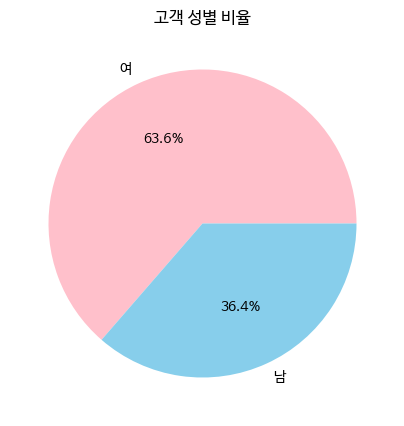

    성별
여  934
남  534


In [ ]:
gender_counts = customer['성별'].value_counts()
colors = ['pink', 'skyblue']
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, colors = colors,autopct='%1.1f%%')
plt.title('고객 성별 비율')
plt.show()

gender_counts = pd.DataFrame(gender_counts)
print(gender_counts)

- 여성 고객이 934명으로, 전체 약 63.6%를 차지한다

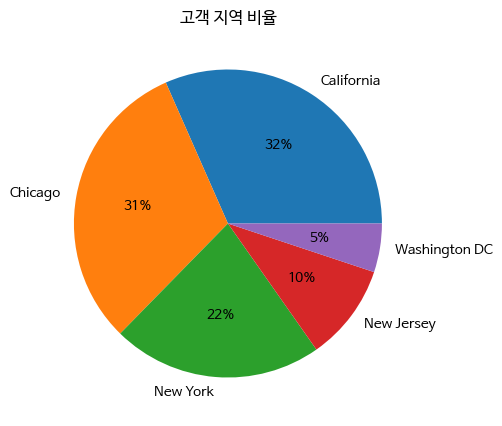

               고객지역
California      464
Chicago         456
New York        324
New Jersey      149
Washington DC    75


In [ ]:
region_counts = customer['고객지역'].value_counts()
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(5, 5))
plt.pie(region_counts, labels=region_counts.index, autopct='%.0f%%')
plt.title('고객 지역 비율')
plt.show()

region_counts = pd.DataFrame(region_counts)
print(region_counts)

- California와 Chicago의 고객은 전체 60% 이상이 거주하는 지역이다
- 반면, Washington DC는 약 5%의 고객이 존재한다.

## 전체 매출 추이

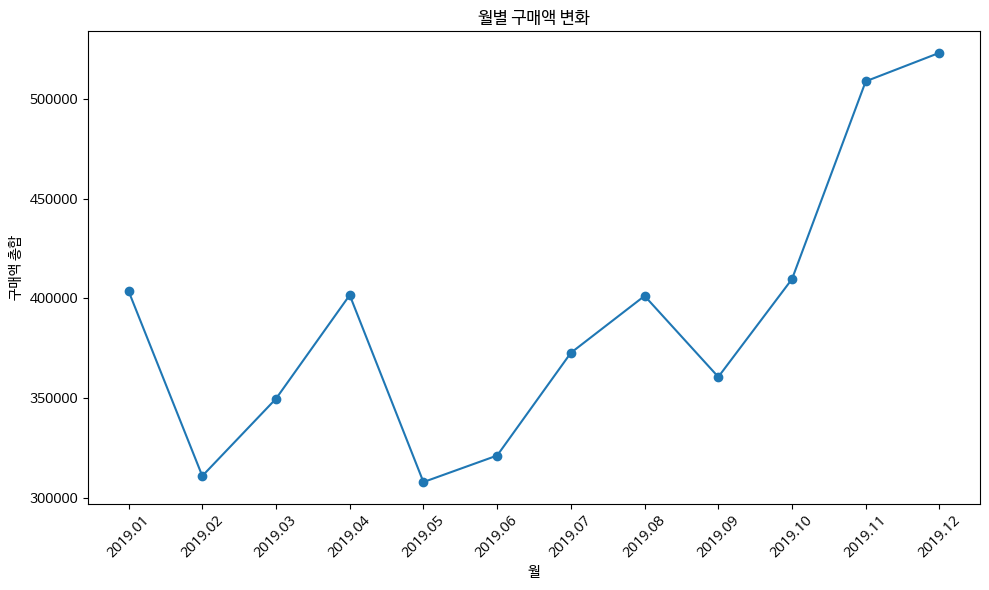

In [ ]:
onlinesales['거래날짜'] = pd.to_datetime(onlinesales['거래날짜'])

onlinesales['월']=onlinesales['거래날짜'].dt.strftime('%Y.%m')

onlinesales['실제금액'] = onlinesales['평균금액'] * onlinesales['수량']
daily_purchase = onlinesales.groupby('월')['실제금액'].sum().reset_index()

# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(daily_purchase['월'], daily_purchase['실제금액'], marker='o', linestyle='-')
plt.title('월별 구매액 변화')
plt.xlabel('월')
plt.ylabel('구매액 총합')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.rc('font', family='NanumBarunGothic')
plt.tight_layout()
plt.show()


- 5월 최저매출을 기록했지만, 점차 증가하여 12월 최고매출을 달성했다
- 특별한 구매 패턴을 파악할 수 없음

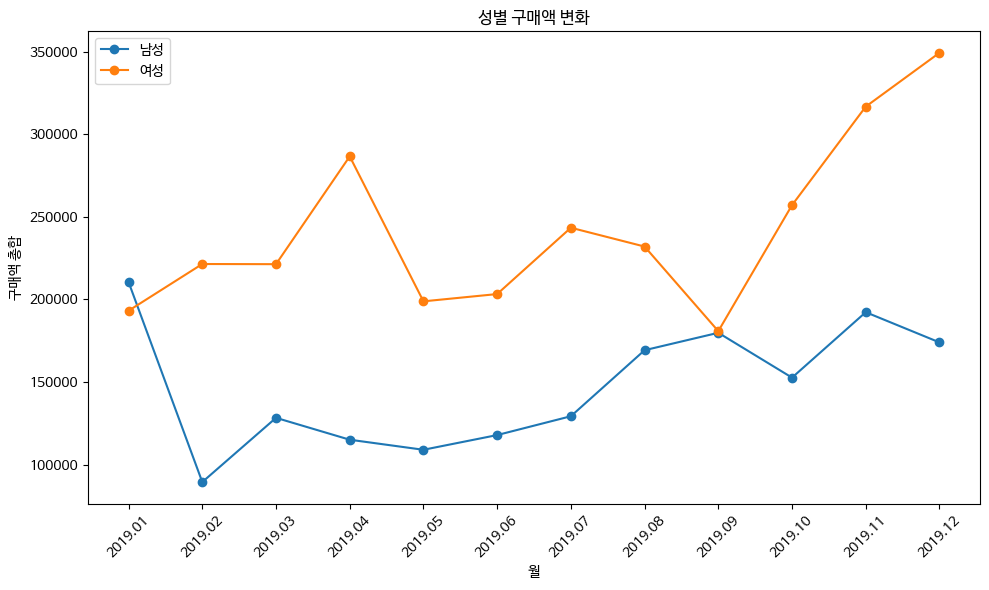

In [ ]:
onlinesales = pd.merge(onlinesales, customer, on='고객ID', how='left')

male_purchase = onlinesales[onlinesales['성별'] == '남'].groupby('월')['실제금액'].sum().reset_index()
female_purchase = onlinesales[onlinesales['성별'] == '여'].groupby('월')['실제금액'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 남성 구매액 그래프
plt.plot(male_purchase['월'], male_purchase['실제금액'], marker='o', linestyle='-', label='남성')

# 여성 구매액 그래프
plt.plot(female_purchase['월'], female_purchase['실제금액'], marker='o', linestyle='-', label='여성')

plt.title('성별 구매액 변화')
plt.xlabel('월')
plt.ylabel('구매액 총합')
plt.xticks(rotation=45)
plt.rc('font', family='NanumBarunGothic')
plt.legend()
plt.tight_layout()
plt.show()

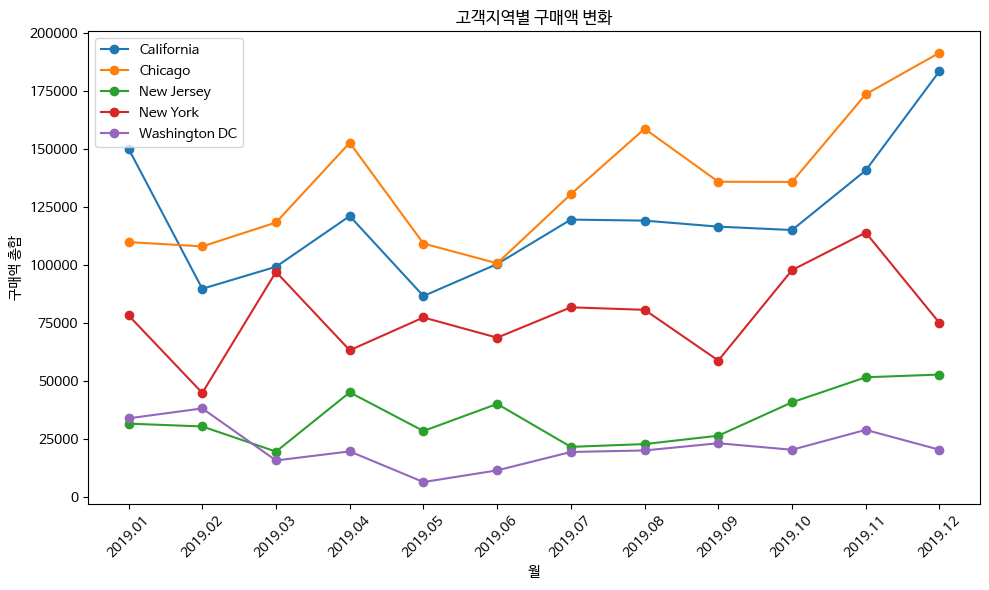

In [ ]:
region_purchase = onlinesales.groupby(['월', '고객지역'])['실제금액'].sum().reset_index()

# 고객지역별 구매액 그래프 그리기
plt.figure(figsize=(10, 6))

# 고객지역별 구매액 그래프 그리기
for region in region_purchase['고객지역'].unique():
    region_data = region_purchase[region_purchase['고객지역'] == region]
    plt.plot(region_data['월'], region_data['실제금액'], marker='o', linestyle='-', label=region)

plt.title('고객지역별 구매액 변화')
plt.xlabel('월')
plt.ylabel('구매액 총합')
plt.xticks(rotation=45)
plt.rc('font', family='NanumBarunGothic')
plt.legend()
plt.tight_layout()
plt.show()

- 고객 분포와 비례한다.

## 마케팅비용 추이

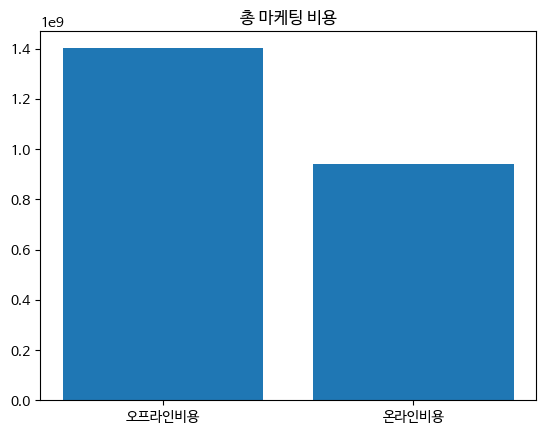

오프라인 비용: 1401165000 원
온라인 비용: 939122734.5 원


In [ ]:
exchange_rate = 1350  # 1달러에 해당하는 원화 환율

plt.rc('font', family='NanumBarunGothic')
data_won = [marketing['오프라인비용'].sum() * exchange_rate, marketing['온라인비용'].sum() * exchange_rate]
plt.bar(['오프라인비용', '온라인비용'], data_won)
plt.title('총 마케팅 비용')
plt.show()

print("오프라인 비용:", marketing['오프라인비용'].sum() * exchange_rate, "원")
print("온라인 비용:", marketing['온라인비용'].sum() * exchange_rate, "원")

- 오프라인 마케팅 비용과 온라인 마케팅 비용은 약 6:4의 비율을 보인다

In [ ]:
marketing = pd.DataFrame(marketing)

# '날짜' 컬럼을 날짜 형식으로 변환
marketing['날짜'] = pd.to_datetime(marketing['날짜'])

# '날짜'를 연도-월 형식으로 변경하여 '월' 컬럼 생성
marketing['월'] = marketing['날짜'].dt.to_period('M')

# 월별 온라인 비용의 평균값 계산
monthly_avg_online_cost = marketing.groupby('월')['온라인비용'].sum()
monthly_avg_offline_cost = marketing.groupby('월')['오프라인비용'].sum()
total_marketing_cost = monthly_avg_online_cost + monthly_avg_offline_cost

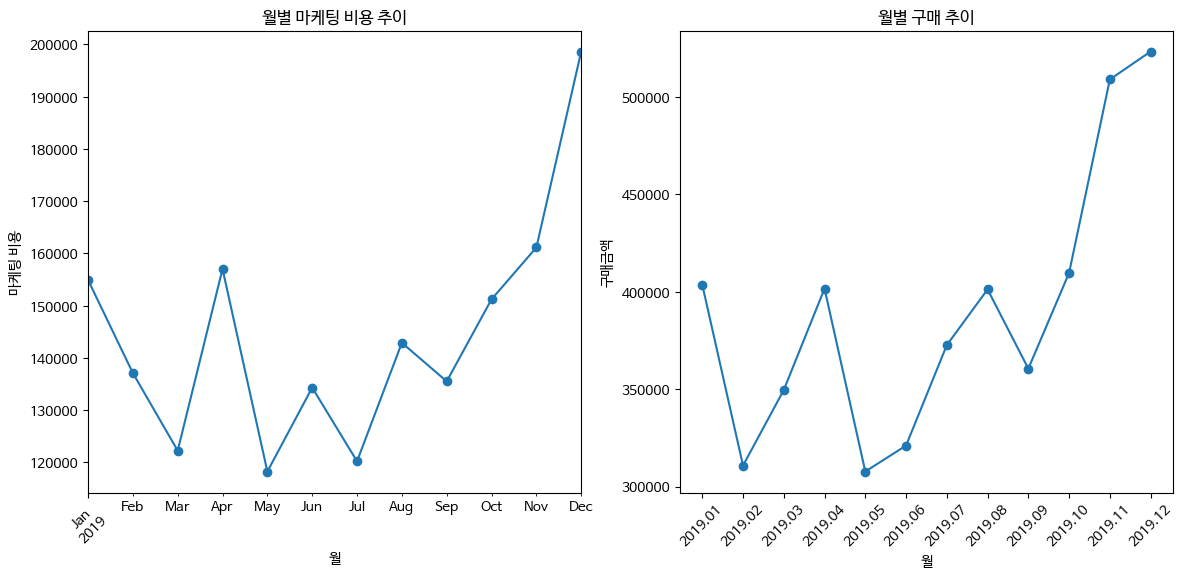

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 그래프
total_marketing_cost.plot(marker='o', linestyle='-')
plt.title('월별 마케팅 비용 추이')
plt.xlabel('월')
plt.ylabel('마케팅 비용')
plt.xticks(rotation=45)  # x축 라벨 회전


# 일별 구매 추이 그래프
plt.rc('font', family='NanumBarunGothic')
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 그래프
plt.plot(daily_purchase['월'], daily_purchase['실제금액'], marker='o', linestyle='-')
plt.title('월별 구매 추이')
plt.xlabel('월')
plt.ylabel('구매금액')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

- 마케팅 비용과 매출을 비교해보았을 때 비례하기 때문에, 효율적인 마케팅을 하고 있다고 볼 수 있다

## Recency

In [ ]:
import pandas as pd

# 데이터 불러오기
onlinesales_df = pd.read_csv("Onlinesales_info.csv")
customer_df = pd.read_csv("Customer_info.csv")

# 두 데이터프레임을 고객ID를 기준으로 병합
Recency_data = pd.merge(onlinesales_df, customer_df, on='고객ID', how='left')

# 병합된 데이터프레임 출력 또는 원하는 처리를 할 수 있습니다.
print(Recency_data)

            고객ID               거래ID        거래날짜          제품ID    제품카테고리  수량  \
0      USER_1358   Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1      USER_1358   Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2      USER_1358   Transaction_0002  2019-01-01  Product_0904    Office   1   
3      USER_1358   Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4      USER_1358   Transaction_0003  2019-01-01  Product_0848      Bags   1   
...          ...                ...         ...           ...       ...  ..   
52919  USER_0504  Transaction_25056  2019-12-31  Product_0976  Nest-USA   1   
52920  USER_0504  Transaction_25057  2019-12-31  Product_0413   Apparel   1   
52921  USER_0504  Transaction_25058  2019-12-31  Product_0989  Nest-USA   1   
52922  USER_0562  Transaction_25059  2019-12-31  Product_0985  Nest-USA   5   
52923  USER_0562  Transaction_25060  2019-12-31  Product_0984  Nest-USA   4   

         평균금액    배송료      쿠폰상태 성별        고객지역  가입기간

In [ ]:
# Recency 계산 : 최소 및 최대 거래 날짜를 기준으로 하여 모든 날짜를 계산
min_transaction_date = pd.to_datetime(Recency_data['거래날짜']).min()
max_transaction_date = pd.to_datetime(Recency_data['거래날짜']).max()

Recency_data['Recency'] = (max_transaction_date - pd.to_datetime(Recency_data['거래날짜'])).dt.days

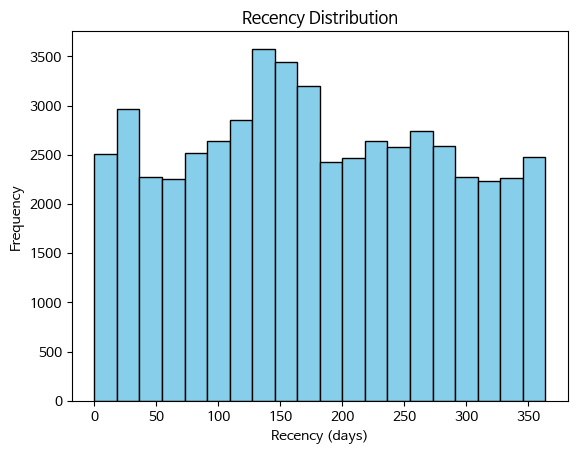

In [ ]:
# Recency 시각화
plt.hist(Recency_data['Recency'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.title('Recency Distribution')
plt.rc('font', family='NanumBarunGothic')
plt.show()

In [ ]:
# 거래기간을 5단계로 나누어서 분류하기
recency_labels = ['Very Recent', 'Recent', 'Neutral', 'Distant', 'Very Distant']
Recency_data['Recency_Category'] = pd.cut(Recency_data['Recency'], bins=5, labels=recency_labels)

### Recency에 따른 고객 그룹의 특징
- Recency_Category: Recency 범주, "Very Recent"부터 "Very Distant"까지의 다섯 가지 범주가 있음
- Gender: 해당 Recency 범주에 속하는 고객들의 성별
- Customer_Region: 해당 Recency 범주에 속하는 고객들이 가장 많이 거주하는 지역
- Membership_Duration: 해당 Recency 범주에 속하는 고객들의 평균 가입 기간

In [ ]:
# Recency 범주에 따라 고객을 분류한 후, 해당 분류에 해당하는 고객들의 특징 확인
recency_analysis = Recency_data.groupby('Recency_Category').agg({
    '성별': pd.Series.mode,
    '고객지역': pd.Series.mode,
    '가입기간': 'mean'
}).reindex(recency_labels).reset_index()

In [ ]:
# Recency_Category에 따른 점수 매핑
recency_score_mapping = {
    'Very Recent': 5,
    'Recent': 4,
    'Neutral': 3,
    'Distant': 2,
    'Very Distant': 1
}

# Recency_data DataFrame에 'Recency_Score' 열 추가
# 각 고객의 Recency_Category에 해당하는 점수로 'Recency_Score'를 할당
Recency_data['Recency_Score'] = Recency_data['Recency_Category'].map(recency_score_mapping)

# 결과 출력
print(Recency_data[['고객ID', 'Recency_Category', 'Recency_Score']])

            고객ID Recency_Category Recency_Score
0      USER_1358     Very Distant             1
1      USER_1358     Very Distant             1
2      USER_1358     Very Distant             1
3      USER_1358     Very Distant             1
4      USER_1358     Very Distant             1
...          ...              ...           ...
52919  USER_0504      Very Recent             5
52920  USER_0504      Very Recent             5
52921  USER_0504      Very Recent             5
52922  USER_0562      Very Recent             5
52923  USER_0562      Very Recent             5

[52924 rows x 3 columns]


In [ ]:
print(recency_analysis)

  Recency_Category 성별        고객지역       가입기간
0      Very Recent  여     Chicago  27.133140
1           Recent  여     Chicago  25.773990
2          Neutral  여     Chicago  26.179620
3          Distant  여  California  25.521021
4     Very Distant  여     Chicago  26.110534


## Frequency

In [ ]:
Frequency_data = pd.read_csv('Frequency.csv')
Frequency_data

,Customer_ID,Transaction_Count,Gender,Customer_Region,Membership_Duration
0,USER_1358,297,남,Chicago,12
1,USER_0190,44,남,California,43
2,USER_0066,42,남,Chicago,33
3,USER_0345,1,여,California,30
4,USER_0683,6,남,California,49
...,...,...,...,...,...
995,USER_1158,86,여,California,19
996,USER_0330,61,여,Chicago,15
997,USER_0455,16,여,California,29
998,USER_1151,23,남,Chicago,7


### Frequency에 따른 고객 그룹의 특징
- Frequency_Segment: Frequency 범주, "5+"부터 "1"까지의 다섯 가지 범주가 있음

In [ ]:
# Frequency 분석 : 각 고객의 거래 빈도에 따라 분류
freq_bins = [0, 1, 2, 3, 5, float('inf')]  # 거래 빈도 구간 설정
freq_labels = ['1', '2', '3', '4-5', '5+']  # 구간별 라벨 설정
Frequency_data['Frequency_Segment'] = pd.cut(Frequency_data['Transaction_Count'], bins=freq_bins, labels=freq_labels)

In [ ]:
# 각 단계 고객 수를 파악
freq_segment_counts = Frequency_data['Frequency_Segment'].value_counts()

print("Frequency Segment 별 고객 수:")
print(freq_segment_counts)

Frequency Segment 별 고객 수:
5+     856
4-5     46
1       39
2       31
3       28
Name: Frequency_Segment, dtype: int64


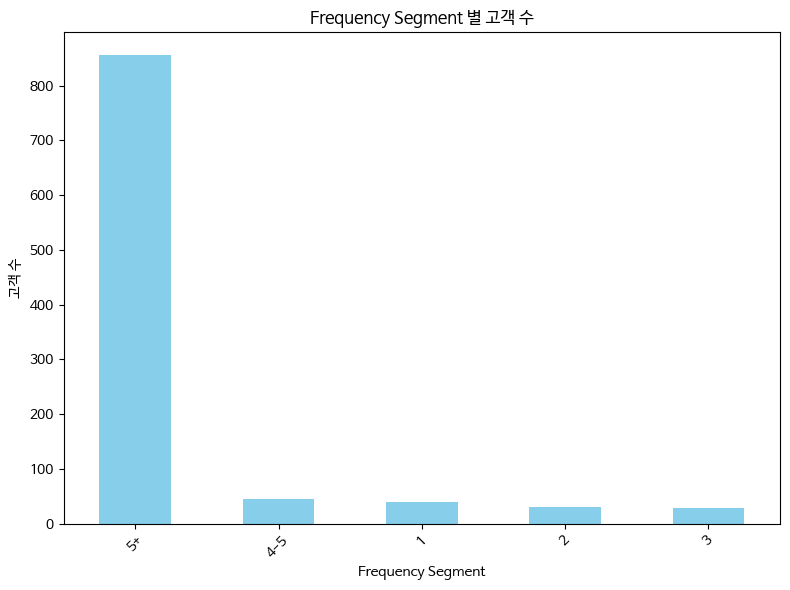

In [ ]:
plt.figure(figsize=(8, 6))
freq_segment_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Segment 별 고객 수')
plt.xlabel('Frequency Segment')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.rc('font', family='NanumBarunGothic')
plt.tight_layout()
plt.show()

In [ ]:
# Frequency 분석 : 각 고객의 거래 빈도에 따라 분류
freq_bins = [0, 1, 2, 3, 5, 10, 15, 20, float('inf')]  # 거래 빈도 구간 설정
freq_labels = ['1', '2', '3', '4-5', '6-10', '11-15', '16-20', '20+']  # 구간별 라벨 설정
Frequency_data['Frequency_Segment'] = pd.cut(Frequency_data['Transaction_Count'], bins=freq_bins, labels=freq_labels)

In [ ]:
# 각 단계 고객 수를 파악
freq_segment_counts = Frequency_data['Frequency_Segment'].value_counts()

print("Frequency Segment 별 고객 수:")
print(freq_segment_counts)

Frequency Segment 별 고객 수:
20+      529
11-15    119
6-10     110
16-20     98
4-5       46
1         39
2         31
3         28
Name: Frequency_Segment, dtype: int64


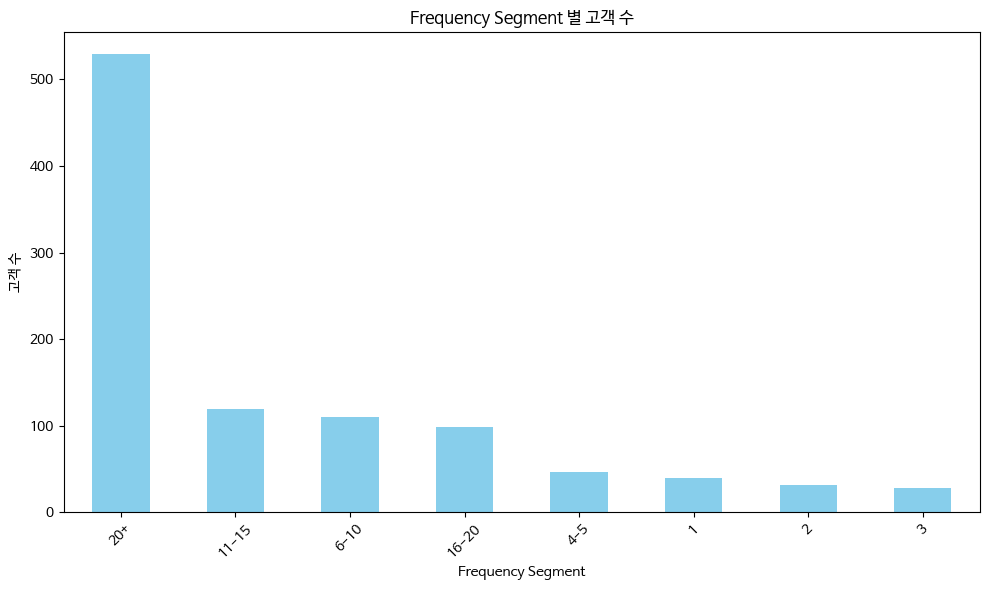

In [ ]:
plt.figure(figsize=(10, 6))
freq_segment_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Segment 별 고객 수')
plt.xlabel('Frequency Segment')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.rc('font', family='NanumBarunGothic')
plt.show()

In [ ]:
# 20+ 범주에 속하는 고객 필터링
freq_20plus_customers = Frequency_data[Frequency_data['Frequency_Segment'] == '20+']

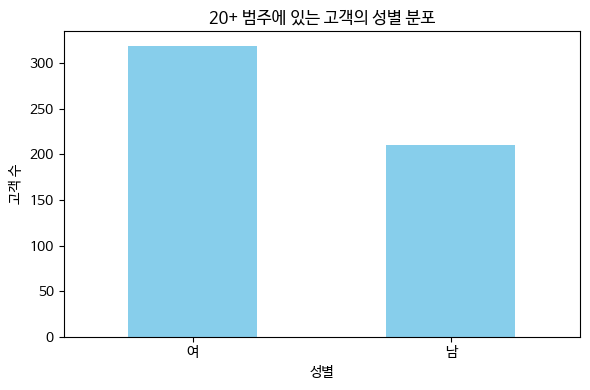

In [ ]:
# 성별 분포 시각화
gender_counts = freq_20plus_customers['Gender'].value_counts()
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('20+ 범주에 있는 고객의 성별 분포')
plt.xlabel('성별')
plt.ylabel('고객 수')
plt.xticks(rotation=0)
plt.rc('font', family='NanumBarunGothic')
plt.tight_layout()
plt.show()

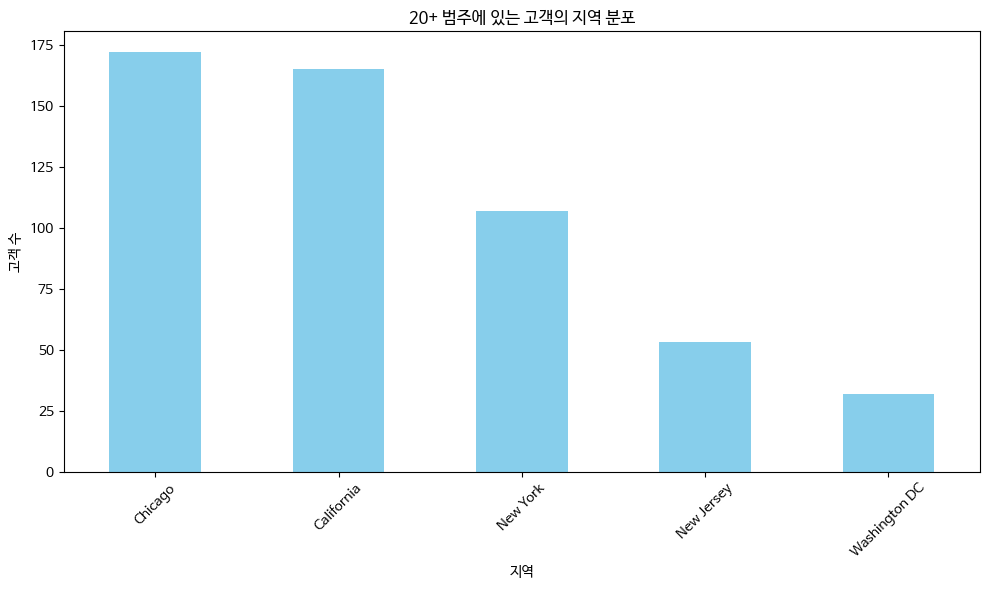

In [ ]:
# 지역 분포 시각화
region_counts = freq_20plus_customers['Customer_Region'].value_counts()
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('20+ 범주에 있는 고객의 지역 분포')
plt.xlabel('지역')
plt.ylabel('고객 수')
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

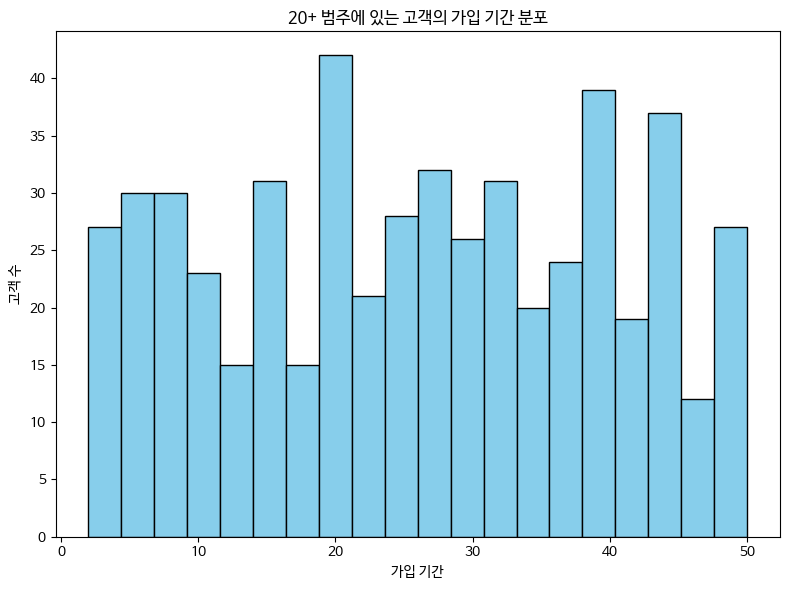

In [ ]:
# 가입 기간 분포 시각화
plt.figure(figsize=(8, 6))
plt.hist(freq_20plus_customers['Membership_Duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('20+ 범주에 있는 고객의 가입 기간 분포')
plt.xlabel('가입 기간')
plt.ylabel('고객 수')
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Monetary

In [ ]:
Monetary_data = pd.read_csv('Monetary.csv')
Monetary_data

,Customer_ID,Gender,Customer_Region,Membership_Duration,Total_Purchase_Amount
0,USER_1358,남,Chicago,12,37714.02
1,USER_0190,남,California,43,3364.75
2,USER_0066,남,Chicago,33,3118.75
3,USER_0345,여,California,30,7.74
4,USER_0683,남,California,49,1108.10
...,...,...,...,...,...
995,USER_0862,남,Chicago,22,5609.75
996,USER_0921,여,Chicago,16,31.69
997,USER_0237,여,Chicago,50,1389.49
998,USER_1027,여,California,20,2305.52


In [ ]:
# Monetary 계산
monetary_df = Monetary_data.groupby('Customer_ID')['Total_Purchase_Amount'].sum().reset_index()
monetary_df.columns = ['Customer_ID', 'Monetary']
monetary_df

,Customer_ID,Monetary
0,USER_0001,14500.04
1,USER_0002,1639.27
2,USER_0006,7607.29
3,USER_0008,10721.99
4,USER_0009,5547.91
...,...,...
995,USER_1462,74.56
996,USER_1463,822.67
997,USER_1464,2995.47
998,USER_1465,153.06


In [ ]:
# 5단계로 구분
monetary_df['Monetary_Segment'] = pd.qcut(monetary_df['Monetary'], q=5, labels=False)

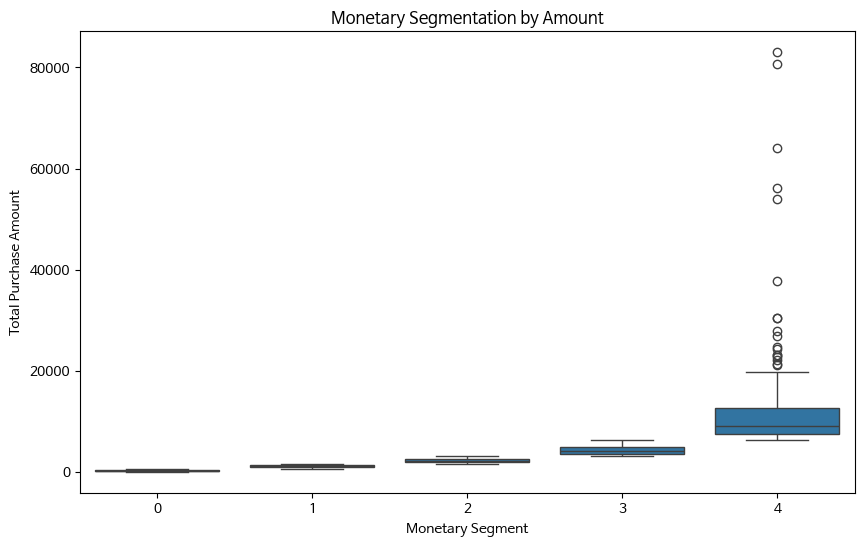

In [ ]:
# Monetary 단계에 따른 금액 차이 시각화
plt.figure(figsize=(10,6))
sns.boxplot(x='Monetary_Segment', y='Monetary', data=monetary_df)
plt.title('Monetary Segmentation by Amount')
plt.rc('font', family='NanumBarunGothic')
plt.xlabel('Monetary Segment')
plt.ylabel('Total Purchase Amount')
plt.show()

In [ ]:
# 이상치 제거
Q1 = monetary_df['Monetary'].quantile(0.25)
Q3 = monetary_df['Monetary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
monetary_df = monetary_df[(monetary_df['Monetary'] > lower_bound) & (monetary_df['Monetary'] < upper_bound)]

In [ ]:
# 5단계로 구분
monetary_df['Monetary_Segment'] = pd.qcut(monetary_df['Monetary'], q=5, labels=False)

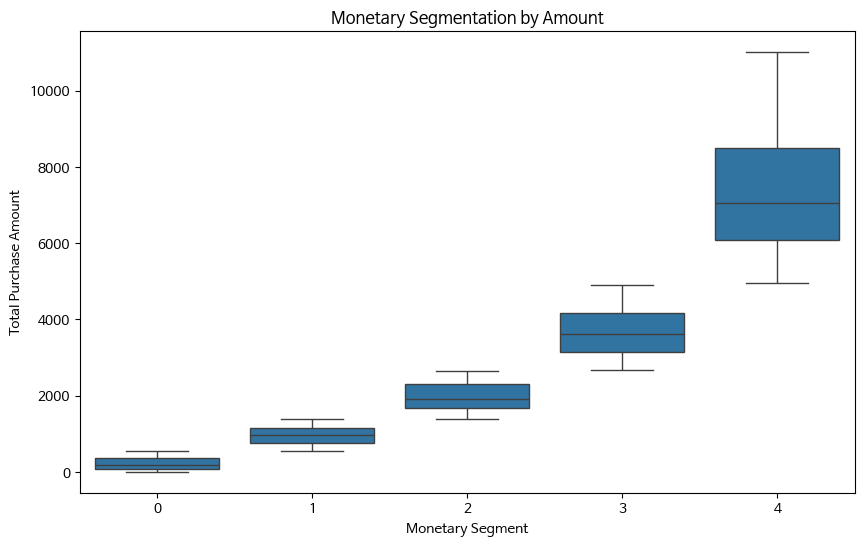

In [ ]:
# Monetary 단계에 따른 금액 차이 시각화
plt.figure(figsize=(10,6))
sns.boxplot(x='Monetary_Segment', y='Monetary', data=monetary_df)
plt.title('Monetary Segmentation by Amount')
plt.xlabel('Monetary Segment')
plt.ylabel('Total Purchase Amount')
plt.rc('font', family='NanumBarunGothic')
plt.show()

In [ ]:
# 4단계에 해당하는 고객의 Customer_ID 가져오기
segment_4_customers = monetary_df[monetary_df['Monetary_Segment'] == 3]['Customer_ID']

In [ ]:
# 4단계에 해당하는 고객들의 정보 가져오기
segment_4_customer_info = Monetary_data[Monetary_data['Customer_ID'].isin(segment_4_customers)]

In [ ]:
# 각 성별에 해당하는 고객 수 계산
female_count = Monetary_data[Monetary_data['Gender'] == '여'].shape[0]
male_count = Monetary_data[Monetary_data['Gender'] == '남'].shape[0]
print('남 : ', male_count, '여 : ', female_count)

남 :  366 여 :  634


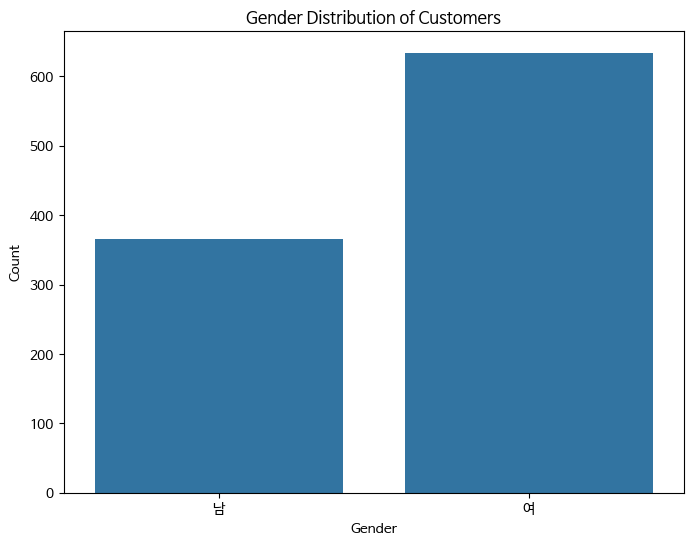

In [ ]:
# 성별 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=Monetary_data)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.rc('font', family='NanumBarunGothic')
plt.show()

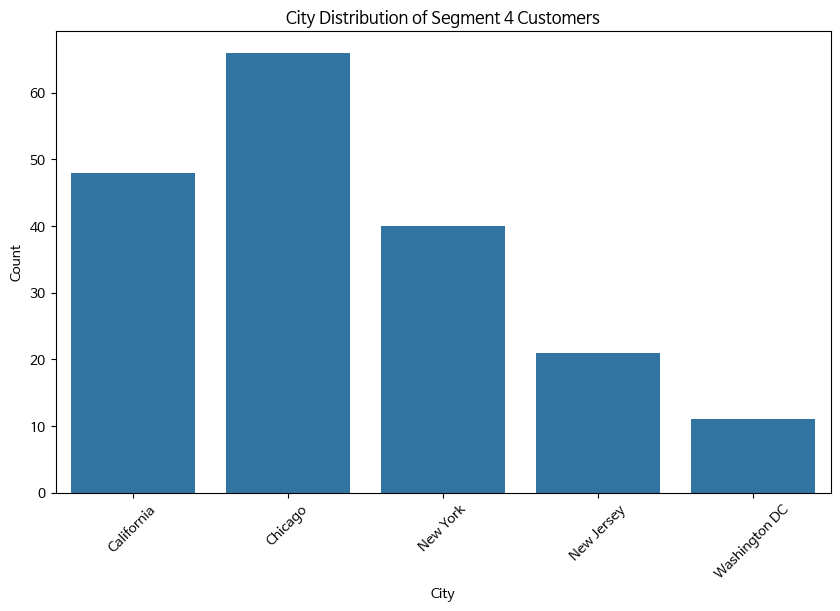

In [ ]:
# 지역 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Region', data=segment_4_customer_info)
plt.title('City Distribution of Segment 4 Customers')
plt.xlabel('City')
plt.ylabel('Count')
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

## RFM_Score

In [ ]:
# Recency_Category에 따른 점수 매핑
recency_score_mapping = {
    'Very Recent': 5,
    'Recent': 4,
    'Neutral': 3,
    'Distant': 2,
    'Very Distant': 1
}

# Recency_data DataFrame에 'Recency_Score' 열 추가
# 각 고객의 Recency_Category에 해당하는 점수로 'Recency_Score'를 할당
Recency_data['Recency_Score'] = Recency_data['Recency_Category'].map(recency_score_mapping)

# 결과 출력
print(Recency_data[['고객ID', 'Recency_Category', 'Recency_Score']])

            고객ID Recency_Category Recency_Score
0      USER_1358     Very Distant             1
1      USER_1358     Very Distant             1
2      USER_1358     Very Distant             1
3      USER_1358     Very Distant             1
4      USER_1358     Very Distant             1
...          ...              ...           ...
52919  USER_0504      Very Recent             5
52920  USER_0504      Very Recent             5
52921  USER_0504      Very Recent             5
52922  USER_0562      Very Recent             5
52923  USER_0562      Very Recent             5

[52924 rows x 3 columns]


In [ ]:
# Frequency_Segment에 따른 점수 매핑
frequency_score_mapping = {
    '1': 1,  # 가장 낮은 거래 빈도 구간
    '2': 2,
    '3': 3,
    '4-5': 4,
    '6-10': 5,
    '11-15': 6,
    '16-20': 7,
    '20+': 8  # 가장 높은 거래 빈도 구간
}

# Frequency_data DataFrame에 'Frequency_Score' 열 추가
# 각 고객의 Frequency_Segment에 해당하는 점수로 'Frequency_Score'를 할당
Frequency_data['Frequency_Score'] = Frequency_data['Frequency_Segment'].map(frequency_score_mapping)

# 결과 출력
print(Frequency_data[['Customer_ID', 'Transaction_Count', 'Frequency_Segment', 'Frequency_Score']])

    Customer_ID  Transaction_Count Frequency_Segment Frequency_Score
0     USER_1358                297               20+               8
1     USER_0190                 44               20+               8
2     USER_0066                 42               20+               8
3     USER_0345                  1                 1               1
4     USER_0683                  6              6-10               5
..          ...                ...               ...             ...
995   USER_1158                 86               20+               8
996   USER_0330                 61               20+               8
997   USER_0455                 16             16-20               7
998   USER_1151                 23               20+               8
999   USER_0777                 11             11-15               6

[1000 rows x 4 columns]


In [ ]:
# Monetary_Segment 값에 1을 더해 점수로 사용 (0부터 시작하기 때문에 1~5의 점수를 얻기 위해)
monetary_df['Monetary_Score'] = monetary_df['Monetary_Segment'] + 1

# 결과 출력
print(monetary_df[['Customer_ID', 'Monetary', 'Monetary_Segment', 'Monetary_Score']])

    Customer_ID  Monetary  Monetary_Segment  Monetary_Score
1     USER_0002   1639.27                 2               3
2     USER_0006   7607.29                 4               5
3     USER_0008  10721.99                 4               5
4     USER_0009   5547.91                 4               5
5     USER_0010    682.89                 1               2
..          ...       ...               ...             ...
995   USER_1462     74.56                 0               1
996   USER_1463    822.67                 1               2
997   USER_1464   2995.47                 3               4
998   USER_1465    153.06                 0               1
999   USER_1467   7080.51                 4               5

[933 rows x 4 columns]


In [ ]:
Recency_data.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,Recency,Recency_Category,Recency_Score
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,364,Very Distant,1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,364,Very Distant,1
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,364,Very Distant,1
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,364,Very Distant,1
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,364,Very Distant,1


In [ ]:
Recency_data.rename(columns={"고객ID": "Customer_ID"}, inplace=True)
Recency_data.head()


,Customer_ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,Recency,Recency_Category,Recency_Score
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,364,Very Distant,1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,364,Very Distant,1
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,364,Very Distant,1
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,364,Very Distant,1
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,364,Very Distant,1


In [ ]:
Frequency_data.head()

,Customer_ID,Transaction_Count,Gender,Customer_Region,Membership_Duration,Frequency_Segment,Frequency_Score
0,USER_1358,297,남,Chicago,12,20+,8
1,USER_0190,44,남,California,43,20+,8
2,USER_0066,42,남,Chicago,33,20+,8
3,USER_0345,1,여,California,30,1,1
4,USER_0683,6,남,California,49,6-10,5


In [ ]:
# 데이터를 병합
merged_data = pd.merge(Recency_data[['Customer_ID', 'Recency_Score']],
                       Frequency_data[['Customer_ID', 'Frequency_Score']],
                       on='Customer_ID')
merged_data = pd.merge(merged_data,
                       monetary_df[['Customer_ID', 'Monetary_Score']],
                       on='Customer_ID')

# 데이터 유형을 범주형으로 변환
merged_data['Recency_Score'] = pd.Categorical(merged_data['Recency_Score'])
merged_data['Frequency_Score'] = pd.Categorical(merged_data['Frequency_Score'])
merged_data['Monetary_Score'] = pd.Categorical(merged_data['Monetary_Score'])

# RFM_score를 계산
merged_data['RFM_score'] = merged_data['Recency_Score'].cat.codes + merged_data['Frequency_Score'].cat.codes + merged_data['Monetary_Score'].cat.codes
print(merged_data)

      Customer_ID Recency_Score Frequency_Score Monetary_Score  RFM_score
0       USER_0190             1               8              4         14
1       USER_0190             1               8              4         14
2       USER_0190             1               8              4         14
3       USER_0190             1               8              4         14
4       USER_0190             1               8              4         14
...           ...           ...             ...            ...        ...
21278   USER_0626             3               4              1          5
21279   USER_0626             3               4              1          5
21280   USER_0626             3               4              1          5
21281   USER_0626             3               4              1          5
21282   USER_0626             3               4              1          5

[21283 rows x 5 columns]


## Loss 분석

In [ ]:
loss_data = pd.read_csv('loss.csv')
loss_data

,Date,Offline_Cost,Online_Cost,Shipping_Fee,GST
0,2019-01-01,4500,2424.50,6.5,0.10
1,2019-01-01,4500,2424.50,6.5,0.10
2,2019-01-01,4500,2424.50,6.5,0.10
3,2019-01-01,4500,2424.50,6.5,0.18
4,2019-01-01,4500,2424.50,6.5,0.18
...,...,...,...,...,...
995,2019-01-08,5000,2551.38,6.5,0.10
996,2019-01-08,5000,2551.38,6.5,0.10
997,2019-01-08,5000,2551.38,6.5,0.18
998,2019-01-08,5000,2551.38,6.5,0.18


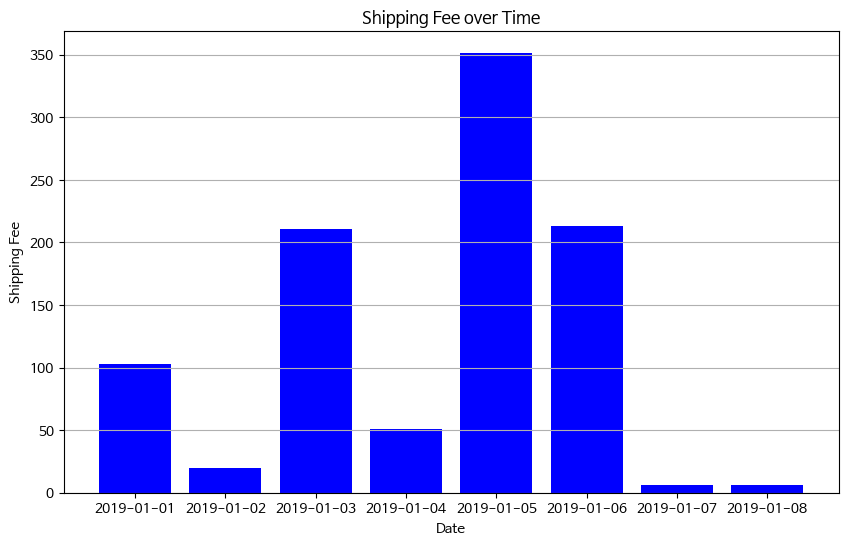

In [ ]:
# Shipping Fee 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(loss_data['Date'], loss_data['Shipping_Fee'], color='b')
plt.xlabel('Date')
plt.ylabel('Shipping Fee')
plt.title('Shipping Fee over Time')
plt.rc('font', family='NanumBarunGothic')
plt.grid(axis='y')
plt.show()

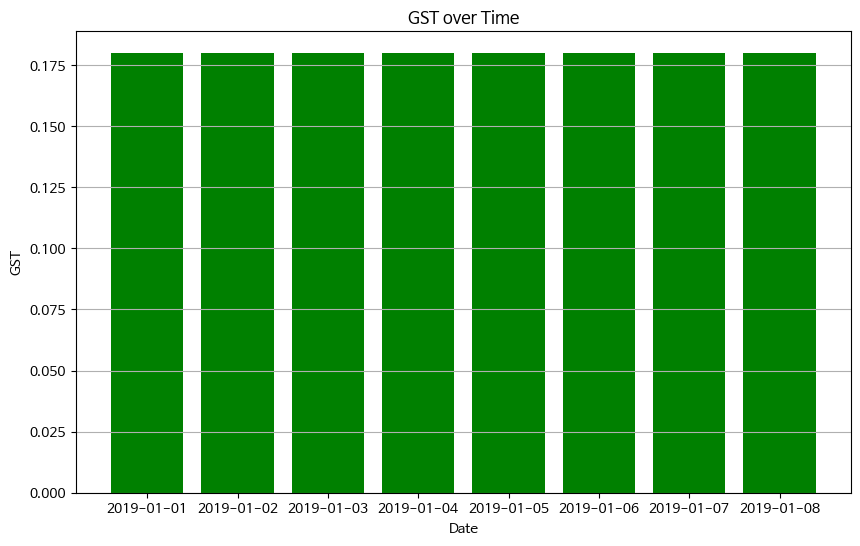

In [ ]:
# GST 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(loss_data['Date'], loss_data['GST'], color='g')
plt.xlabel('Date')
plt.ylabel('GST')
plt.title('GST over Time')
plt.grid(axis='y')
plt.show()

## 이상치 감지 및 처리

In [ ]:
def remove_outlier(df, column):
    Q1 = df[column].quantile(q=0.25)
    Q3 = df[column].quantile(q=0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치가 아닌 값만을 선택
    df_without_outlier = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_without_outlier

In [ ]:
print(onlinesales)

            고객ID               거래ID       거래날짜          제품ID    제품카테고리  수량  \
0      USER_1358   Transaction_0000 2019-01-01  Product_0981  Nest-USA   1   
1      USER_1358   Transaction_0001 2019-01-01  Product_0981  Nest-USA   1   
2      USER_1358   Transaction_0002 2019-01-01  Product_0904    Office   1   
3      USER_1358   Transaction_0003 2019-01-01  Product_0203   Apparel   5   
4      USER_1358   Transaction_0003 2019-01-01  Product_0848      Bags   1   
...          ...                ...        ...           ...       ...  ..   
52919  USER_0504  Transaction_25056 2019-12-31  Product_0976  Nest-USA   1   
52920  USER_0504  Transaction_25057 2019-12-31  Product_0413   Apparel   1   
52921  USER_0504  Transaction_25058 2019-12-31  Product_0989  Nest-USA   1   
52922  USER_0562  Transaction_25059 2019-12-31  Product_0985  Nest-USA   5   
52923  USER_0562  Transaction_25060 2019-12-31  Product_0984  Nest-USA   4   

         평균금액    배송료      쿠폰상태        월    실제금액 성별        고객지역 

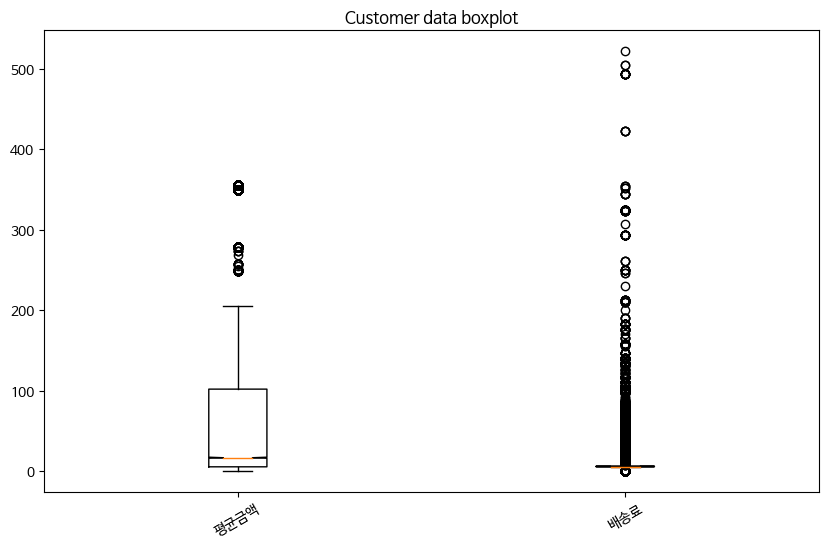

In [ ]:
onlinesales_labels = ['평균금액', '배송료']
idx = np.arange(1, 3)
plt.figure(figsize=(10, 6))
plt.title("Customer data boxplot")
plt.rc('font', family='NanumBarunGothic')
plt.boxplot(onlinesales[onlinesales_labels], notch=True)
plt.xticks(idx, onlinesales_labels, rotation=30)
plt.show()


In [ ]:
# 평균 금액에 대한 이상치 제거
onlinesales_info_cleaned = remove_outlier(onlinesales, "평균금액")

# Dataframe size 변화
print(f"Original data size : {onlinesales.shape}")
print(f"Cleaned data size : {onlinesales_info_cleaned.shape}")

Original data size : (52924, 14)
Cleaned data size : (52196, 14)


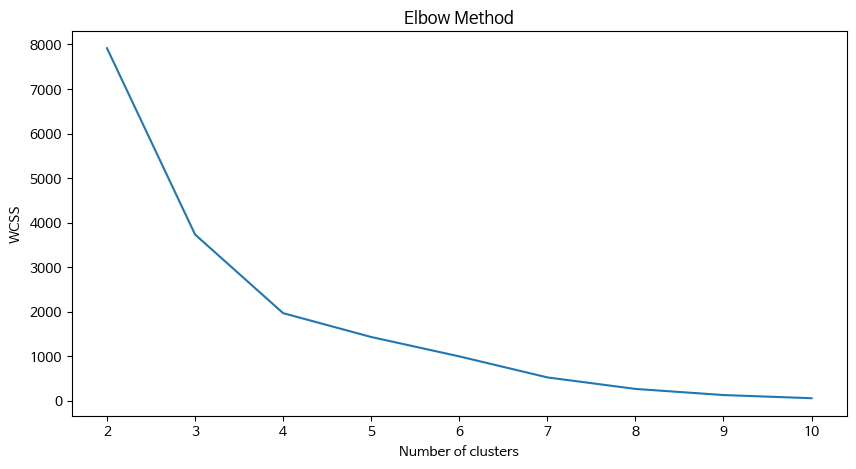

In [ ]:
# Elbow method 사용해서 최적의 클러스터 수 찾기

scaler = StandardScaler()
X = merged_data[['RFM_score']]
X = scaler.fit_transform(X)
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.rc('font', family='NanumBarunGothic')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



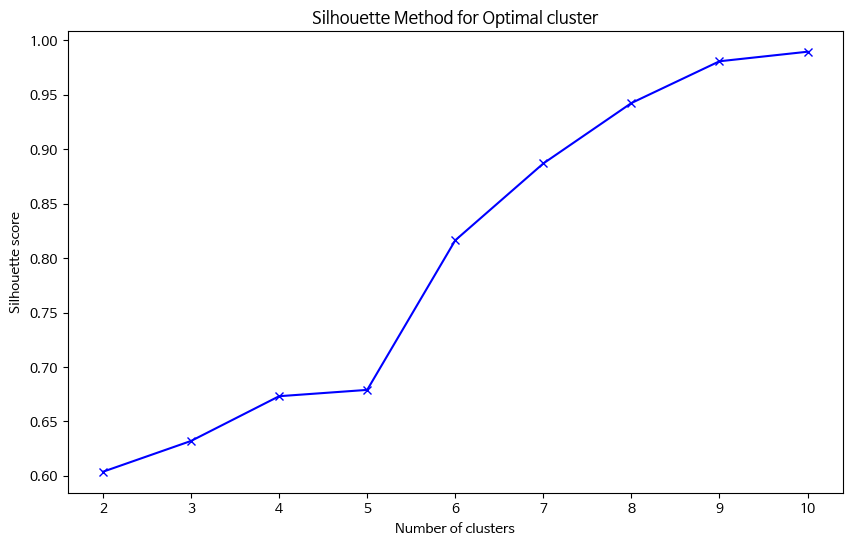

In [ ]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# # 실루엣 점수가 가장 높은 클러스터 수 찾기
# best_score = max(silhouette_scores)
# best_cluster_size = silhouette_scores.index(best_score) + 2

# print(f"최적의 클러스터 수 : {best_cluster_size}")

# 최적의 클러스터 수를 바탕으로 K-Means clustering 실행
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=1234)
merged_data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.rc('font', family='NanumBarunGothic')
plt.title('Silhouette Method for Optimal cluster')
plt.show()

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21283 entries, 0 to 21282
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Customer_ID      21283 non-null  object  
 1   Recency_Score    21283 non-null  category
 2   Frequency_Score  21283 non-null  category
 3   Monetary_Score   21283 non-null  category
 4   RFM_score        21283 non-null  int8    
 5   Cluster          21283 non-null  int32   
dtypes: category(3), int32(1), int8(1), object(1)
memory usage: 499.6+ KB


In [ ]:
print(merged_data['Cluster'].value_counts())

1    4710
3    3983
4    3890
0    3567
5    3330
2    1475
6     328
Name: Cluster, dtype: int64


#Cohort 분석

In [ ]:
merged_data['고객ID'] = merged_data['Customer_ID']
onlinesales_with_cluster = pd.merge(onlinesales, merged_data[['고객ID', 'Cluster']], on='고객ID', how='left')

In [ ]:
onlinesales_with_cluster['최종결제금액'] = onlinesales_with_cluster['평균금액'] * onlinesales_with_cluster['수량']

In [ ]:
ch_data = onlinesales_with_cluster[['고객ID','거래날짜','최종결제금액','고객지역','성별']]
ch_data['거래날짜'] = pd.to_datetime(ch_data['거래날짜'], errors='coerce')
ch_data['거래월'] = ch_data['거래날짜'].dt.strftime('%Y.%m')

first_order = ch_data.groupby('고객ID').거래날짜.min()
first_order = first_order.dt.strftime('%Y.%m')

ch_data = ch_data.set_index('고객ID')
ch_data['FirstOrder'] = first_order
ch_data.reset_index(inplace = True)

first_order_day = ch_data.groupby('고객ID').거래날짜.min().rename('첫구매일')
ch_first= pd.merge(ch_data, first_order_day, on = '고객ID', how = 'left')

ch_first['거래날짜'] = pd.to_datetime(ch_first['거래날짜'], errors='coerce')
ch_first['FirstOrder'] = pd.to_datetime(ch_first['FirstOrder'], errors='coerce')
month_diff = ch_first['거래날짜'].dt.month - ch_first['FirstOrder'].dt.month
ch_first['cohortindex'] = month_diff

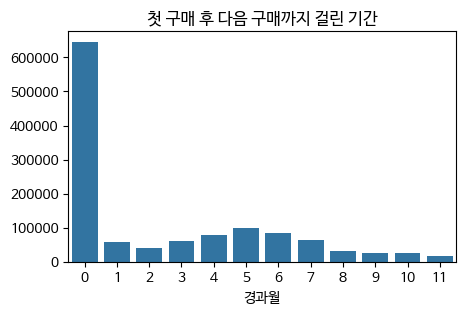

In [ ]:
plt.figure(figsize = (5,3))
sns.countplot(data = ch_first, x = "cohortindex")
plt.title(x=0.5, label='첫 구매 후 다음 구매까지 걸린 기간')
plt.xlabel("경과월")
plt.ylabel("")
plt.show()
plt.rc('font', family='NanumBarunGothic')

-   첫 구매이후 다음 구매가 가장 많은 달은 5개월차이다

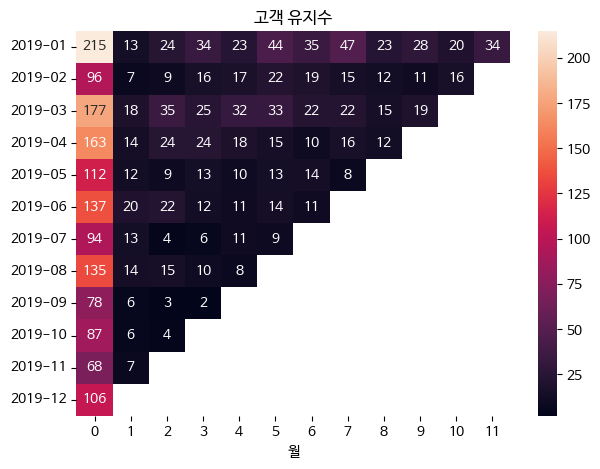

In [ ]:
ch_first['첫거래달'] = ch_first['FirstOrder'].astype(str).str[:7]
cohort_count = ch_first.groupby(["첫거래달","cohortindex"])["고객ID"].nunique().unstack()

plt.figure(figsize = (7,5))
sns.heatmap(cohort_count, annot = True, fmt = ".0f")
plt.xlabel('월')
plt.ylabel('')
plt.rc('font', family='NanumBarunGothic')
plt.title(x=0.5, label='고객 유지수')
plt.show()

-   1월, 3월, 4월, 6월, 8월 신규 고객 유입이 많다
-   1,2개월이내에 재구매하지 않은 고객들은 유지수가 떨어진다

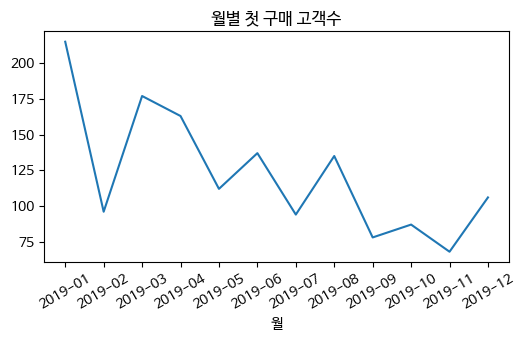

In [ ]:
plt.figure(figsize=(6,3))
sns.lineplot(data=cohort_count[0], palette='YlGnBu')
plt.xticks(rotation=30)
plt.title(x=0.5,label='월별 첫 구매 고객수')
plt.xlabel("월")
plt.ylabel("")
plt.rc('font', family='NanumBarunGothic')
plt.show()

In [ ]:
onlinesales_with_cluster = onlinesales_with_cluster.rename(columns={"실제금액": "최종결제금액"})
onlinesales_with_cluster.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,최종결제금액,성별,고객지역,가입기간,Cluster,최종결제금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,2019.01,153.71,남,Chicago,12,NaN,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,2019.01,153.71,남,Chicago,12,NaN,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2019.01,2.05,남,Chicago,12,NaN,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,2019.01,87.65,남,Chicago,12,NaN,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,2019.01,16.50,남,Chicago,12,NaN,16.50


In [ ]:
onlinesales_with_cluster['OrderCycle']=onlinesales_with_cluster['거래날짜'].dt.strftime('%Y.%m')

In [ ]:
onlinesales_with_cluster = onlinesales_with_cluster.set_index('고객ID')

## 데이터 First 데이터는 Series + DF는 pandas이기에 Index 기준 자동 병합가능
onlinesales_with_cluster['FirstOrder'] = first_order

## Index의 정상화
onlinesales_with_cluster.reset_index(inplace = True)

# onlinesales_with_cluster.sample(3)

In [ ]:
co1 = onlinesales_with_cluster.groupby(['FirstOrder', 'OrderCycle']).고객ID.nunique()
co1 = co1.reset_index()
co1.rename({'고객ID':'TotalUsers'}, axis = 1, inplace = True)

## 주기별 구매 금액 계산
co2 = onlinesales_with_cluster.groupby(['FirstOrder', 'OrderCycle']).apply(lambda x: (x['평균금액'] * x['수량']).sum()).reset_index(name='PurchaseAmnt')
co2 = co2.reset_index()
co2.rename({'평균금액': 'PurchaseAmnt'}, axis = 1, inplace = True)

## 데이터의 병합
co = co1.merge(co2, on = ['FirstOrder', 'OrderCycle'])
# co.sample(3)

In [ ]:
ch_data = onlinesales_with_cluster[['고객ID','거래날짜','최종결제금액','고객지역','성별']]
ch_data['거래날짜'] = pd.to_datetime(ch_data['거래날짜'], errors='coerce')
ch_data['거래월'] = ch_data['거래날짜'].dt.strftime('%Y.%m')

first_order = ch_data.groupby('고객ID').거래날짜.min()
first_order = first_order.dt.strftime('%Y.%m')

ch_data = ch_data.set_index('고객ID')
ch_data['FirstOrder'] = first_order
ch_data.reset_index(inplace = True)

first_order_day = ch_data.groupby('고객ID').거래날짜.min().rename('첫구매일')
ch_first= pd.merge(ch_data, first_order_day, on = '고객ID', how = 'left')

ch_first['거래날짜'] = pd.to_datetime(ch_first['거래날짜'], errors='coerce')
ch_first['FirstOrder'] = pd.to_datetime(ch_first['FirstOrder'], errors='coerce')
month_diff = ch_first['거래날짜'].dt.month - ch_first['FirstOrder'].dt.month
ch_first['cohortindex'] = month_diff

In [ ]:
# Cohort Period
from ipypb import ipb
temp = []

for i in ipb(range(co.shape[0])):
    f_first_order = pd.to_datetime(co.FirstOrder[i]).to_period('M')
    f_order_cycle = pd.to_datetime(co.OrderCycle[i]).to_period('M')

    month_diff = (f_order_cycle - f_first_order).n

    temp.append(month_diff)
co['CohortPeriod'] = temp


 [████████████████████████████████████████████████████████████] 78/78 [00:00<00:00, 0.00s/it]

In [ ]:
## 첫 번째. 재방문율 계산을 위한 Pandas Unstack 활용
co_retention = co.set_index(['FirstOrder', 'CohortPeriod'])
co_retention = co_retention.TotalUsers.unstack(1)
retention = co_retention.div(co_retention[0],axis = 0)


## 두 번째. 구매 규모 형태 치환을 위한 Pandas Unstack 활용
co_purchase = co.set_index(['FirstOrder', 'CohortPeriod'])
co_purchase = co_purchase.PurchaseAmnt.unstack(1)

<Axes: xlabel='CohortPeriod', ylabel='FirstOrder'>

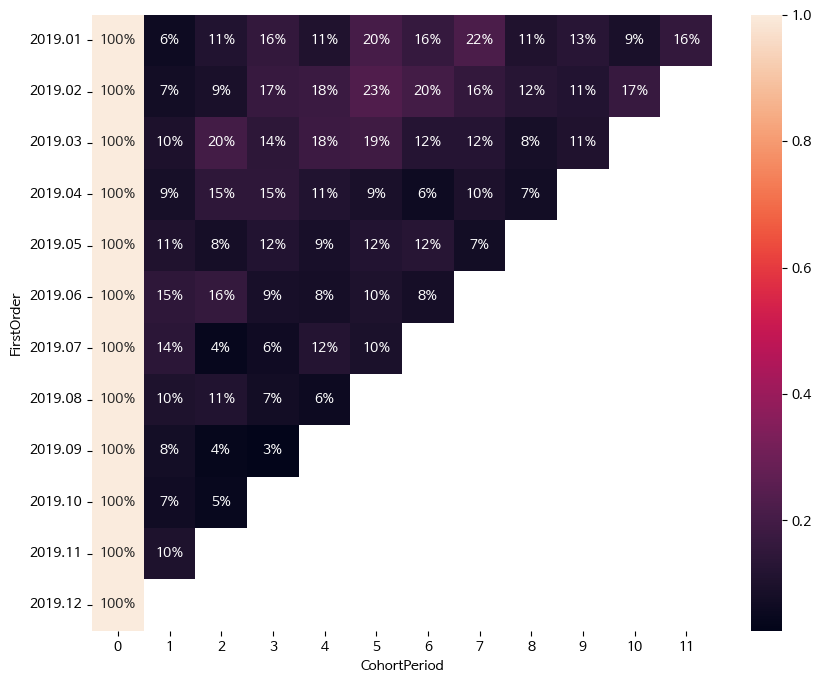

In [ ]:
## 재방문율 시각화 진행
plt.rcParams['figure.figsize'] = (10, 8)
plt.rc('font', family='NanumBarunGothic')
sns.heatmap(retention, annot = True, fmt = '.0%')

-   5,6,7월 재구매율이 상승한다

# Cluster별 Cohort분석 진행

In [ ]:
Cluster1_df= onlinesales_with_cluster[onlinesales_with_cluster['Cluster'] == 0]
Cluster2_df= onlinesales_with_cluster[onlinesales_with_cluster['Cluster'] == 1]
Cluster3_df= onlinesales_with_cluster[onlinesales_with_cluster['Cluster'] == 2]
Cluster4_df= onlinesales_with_cluster[onlinesales_with_cluster['Cluster'] == 3]
Cluster5_df= onlinesales_with_cluster[onlinesales_with_cluster['Cluster'] == 4]
Cluster6_df= onlinesales_with_cluster[onlinesales_with_cluster['Cluster'] == 5]
Cluster7_df= onlinesales_with_cluster[onlinesales_with_cluster['Cluster'] == 6]

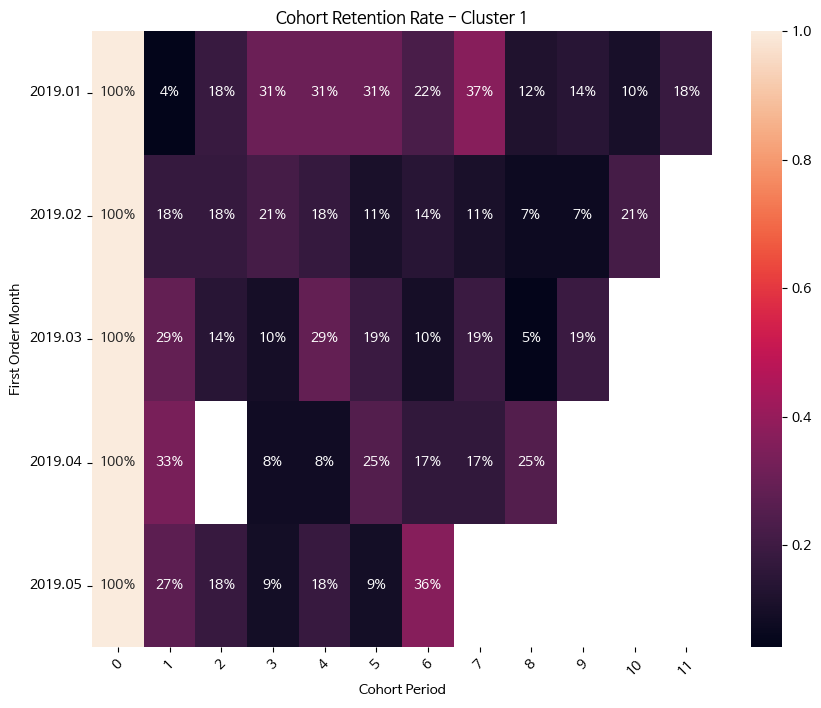

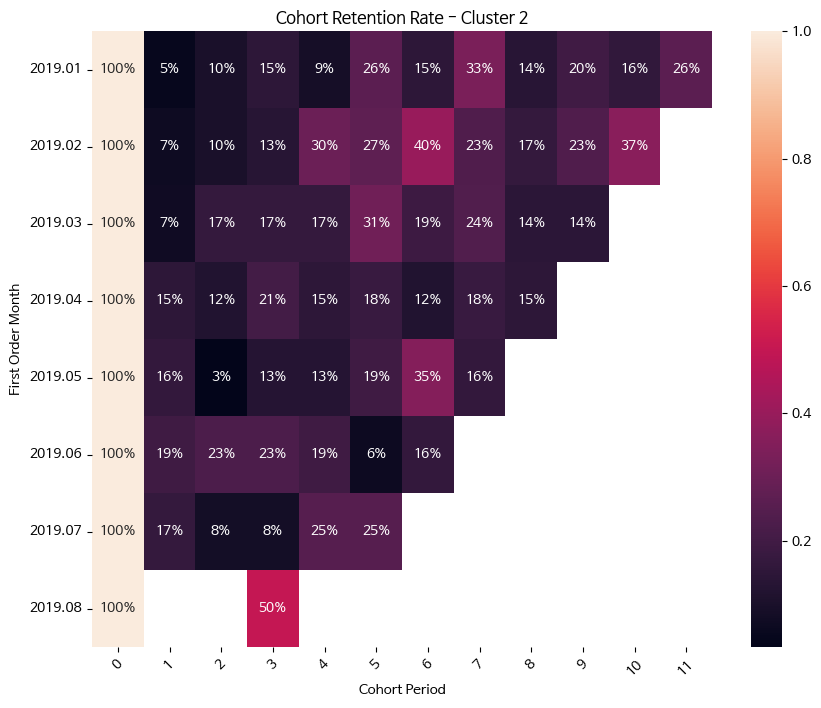

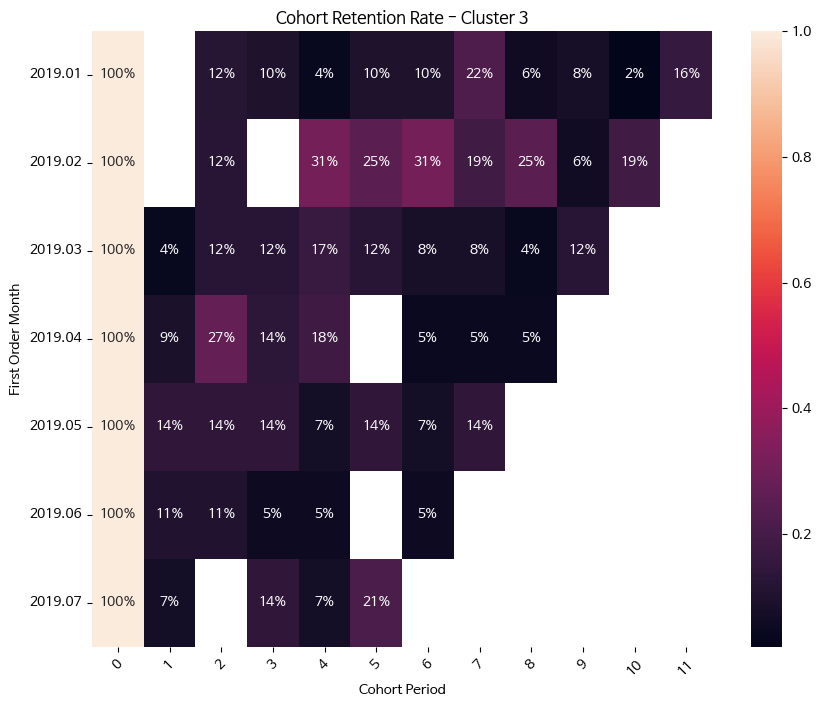

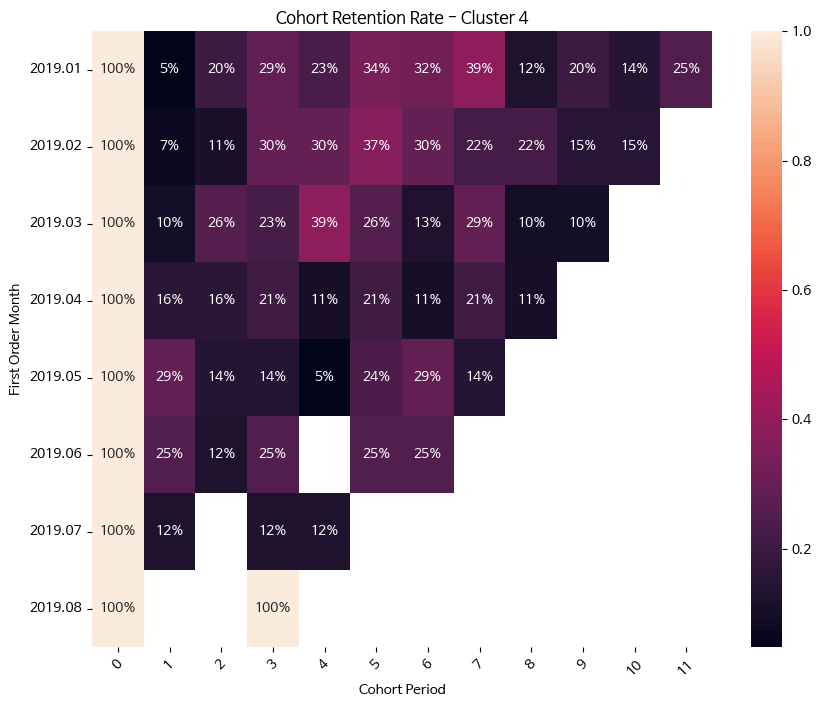

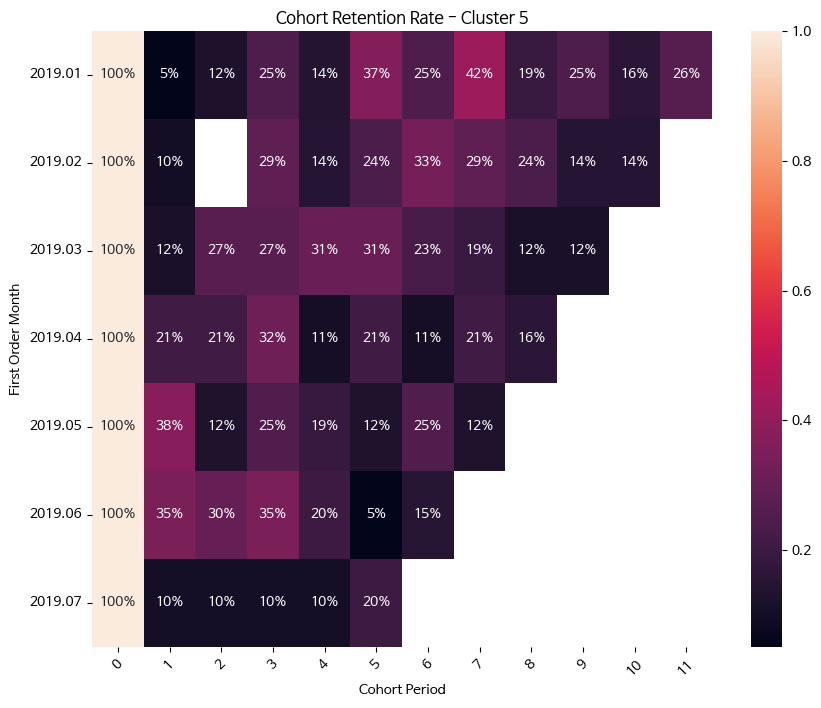

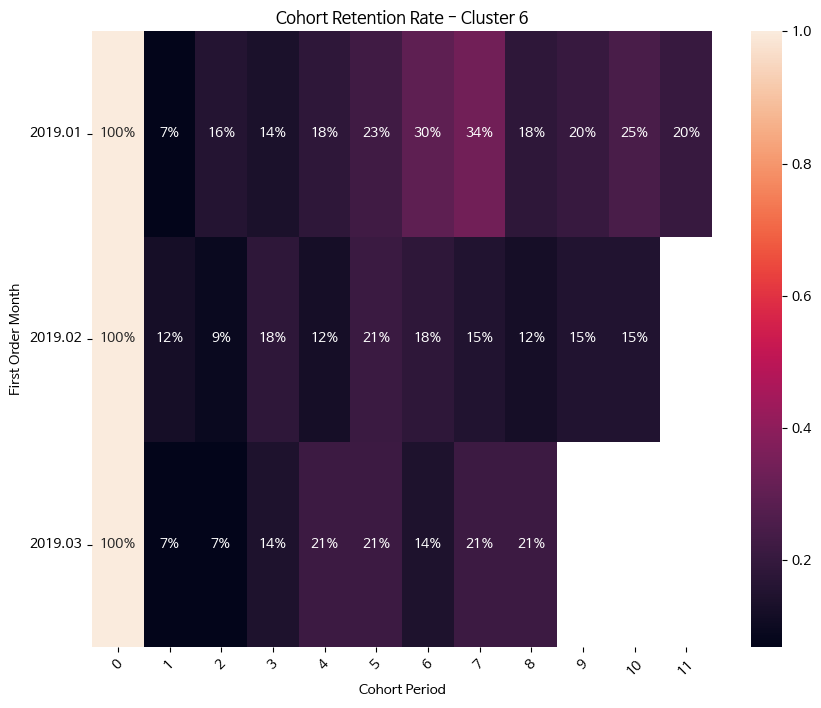

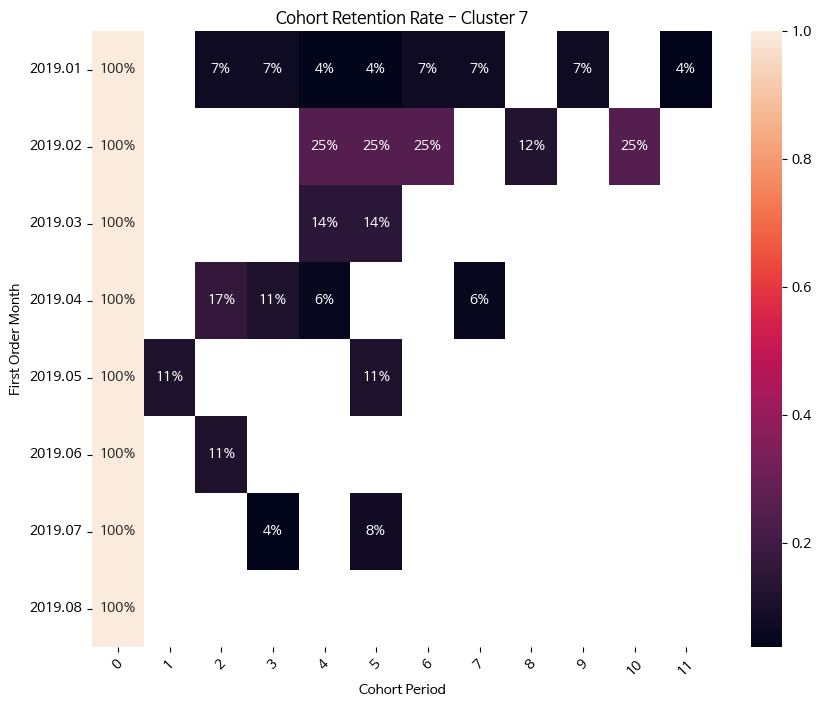

In [ ]:
def process_and_visualize_cluster_cohort(cluster_df, cluster_number):
    # 주기별 고객 수 계산
    co1 = cluster_df.groupby(['FirstOrder', 'OrderCycle']).고객ID.nunique().reset_index()
    co1.rename({'고객ID':'TotalUsers'}, axis=1, inplace=True)

    # 주기별 구매 금액 계산
    co2 = cluster_df.groupby(['FirstOrder', 'OrderCycle']).apply(lambda x: (x['평균금액'] * x['수량']).sum()).reset_index(name='PurchaseAmnt')

    # 데이터 병합
    co = co1.merge(co2, on=['FirstOrder', 'OrderCycle'])

    # Cohort Period 계산
    temp = []
    for i in range(co.shape[0]):
        f_first_order = pd.to_datetime(co.FirstOrder[i]).to_period('M')
        f_order_cycle = pd.to_datetime(co.OrderCycle[i]).to_period('M')
        month_diff = (f_order_cycle - f_first_order).n
        temp.append(month_diff)
    co['CohortPeriod'] = temp

    # 재방문율 계산을 위한 Pandas Unstack
    co_retention = co.set_index(['FirstOrder', 'CohortPeriod'])
    co_retention = co_retention.TotalUsers.unstack(1)
    retention = co_retention.div(co_retention[0], axis=0)

    # 재방문율 시각화
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.rc('font', family='NanumBarunGothic')
    ax = sns.heatmap(retention, annot=True, fmt='.0%')

    # 코호트 이름 추가
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.title(f'Cohort Retention Rate - Cluster {cluster_number}')
    plt.xlabel('Cohort Period')
    plt.ylabel('First Order Month')

    # 그래프 상에 클러스터 이름 추가
    plt.show()

# 각 클러스터에 대해 데이터 처리 및 시각화
for i in range(1, 8):
    cluster_df = globals()[f"Cluster{i}_df"]
    process_and_visualize_cluster_cohort(cluster_df, i)

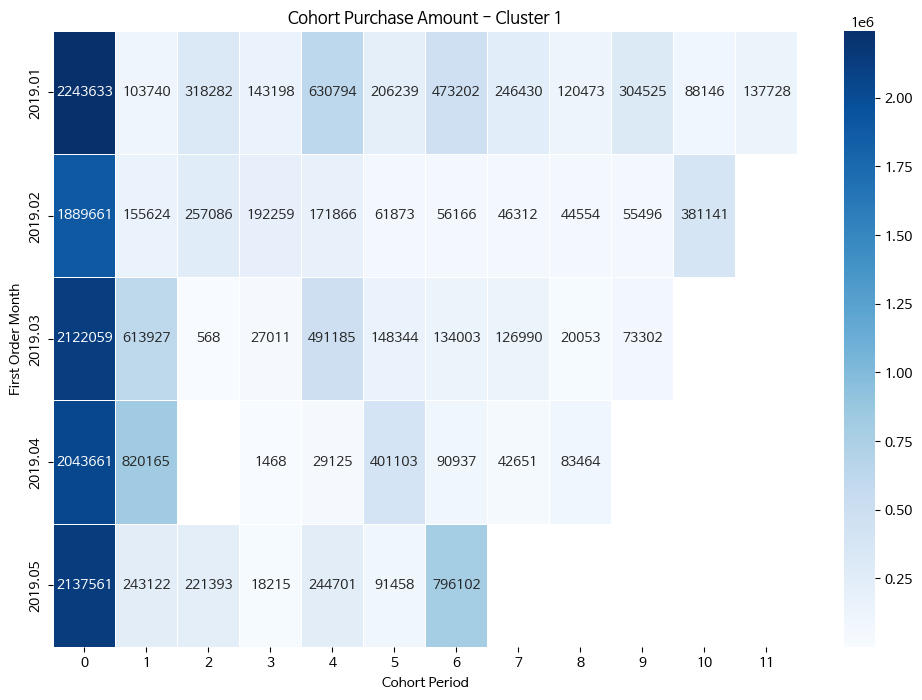

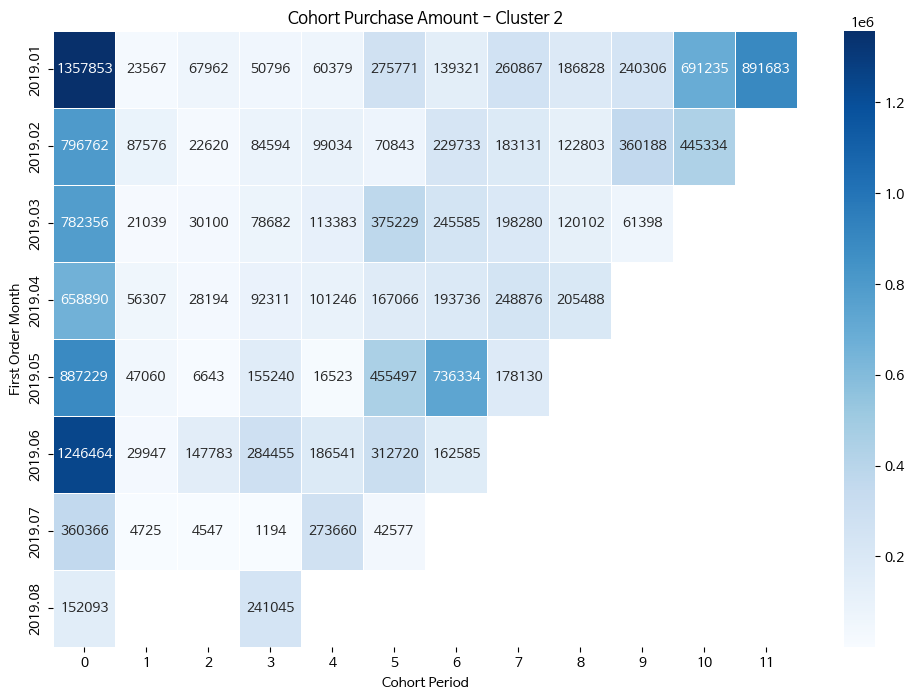

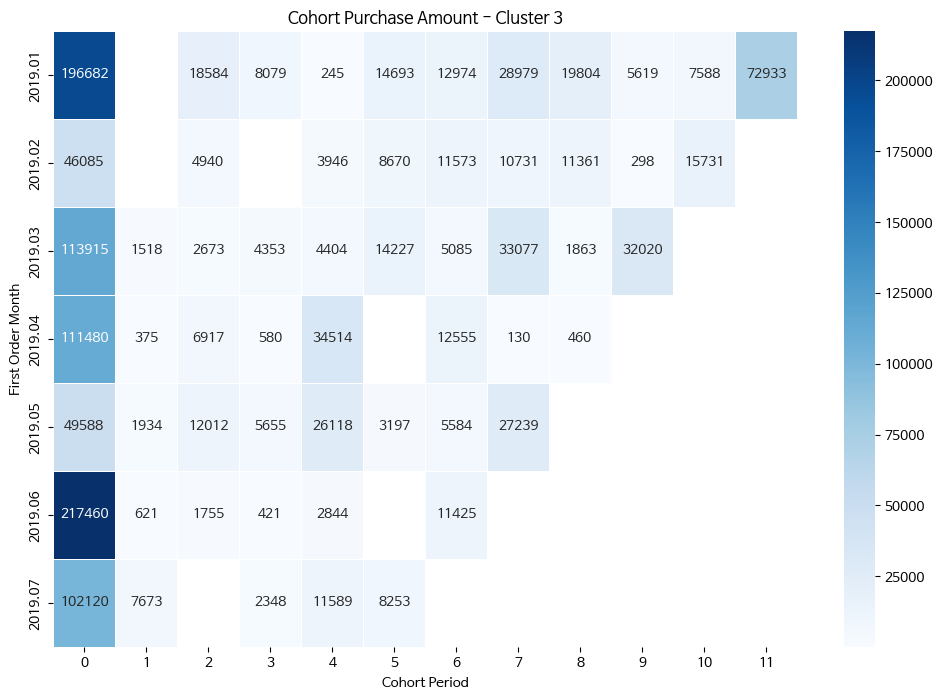

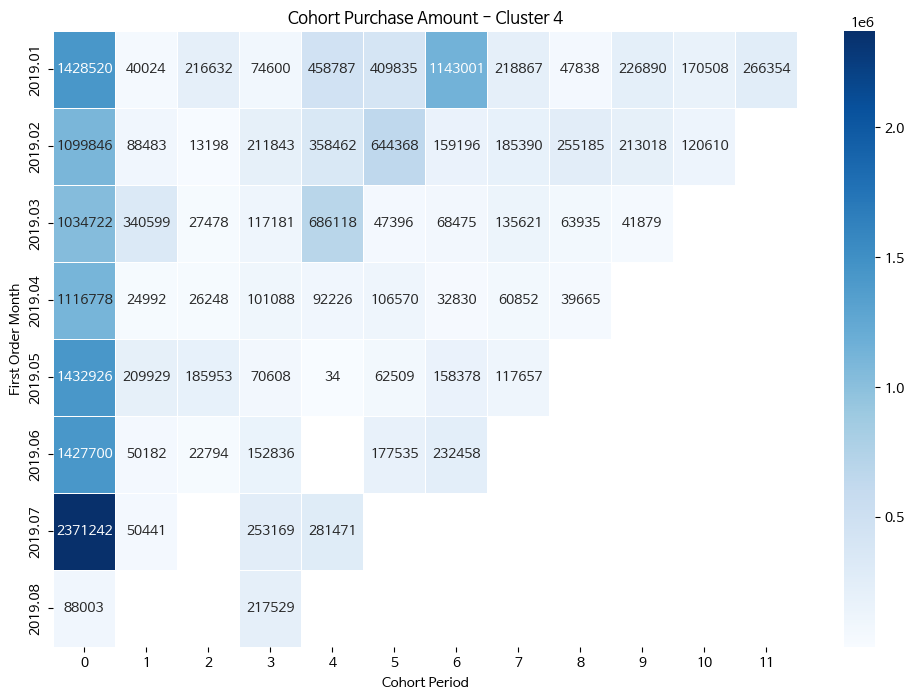

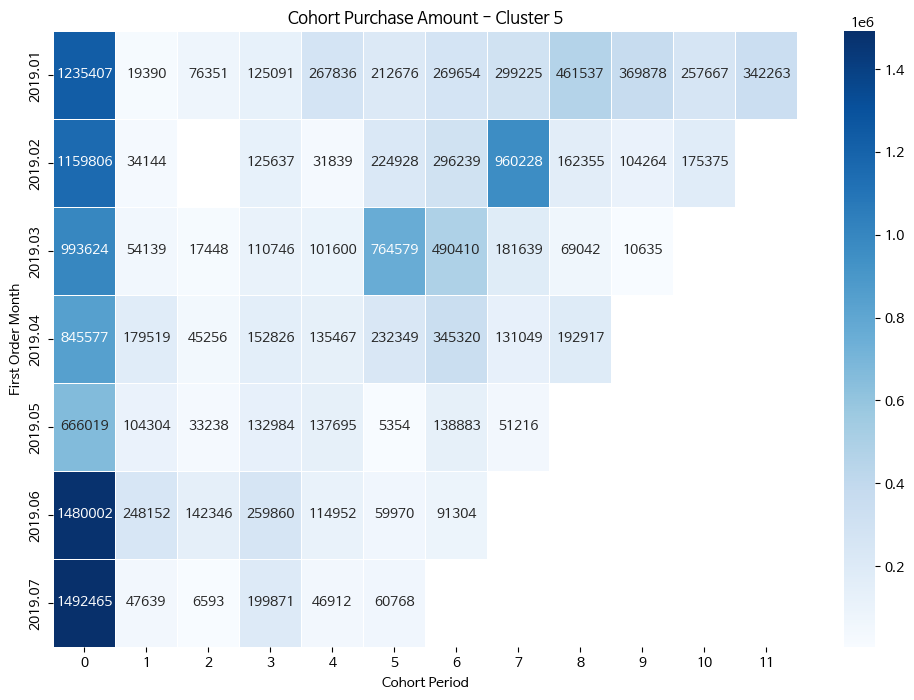

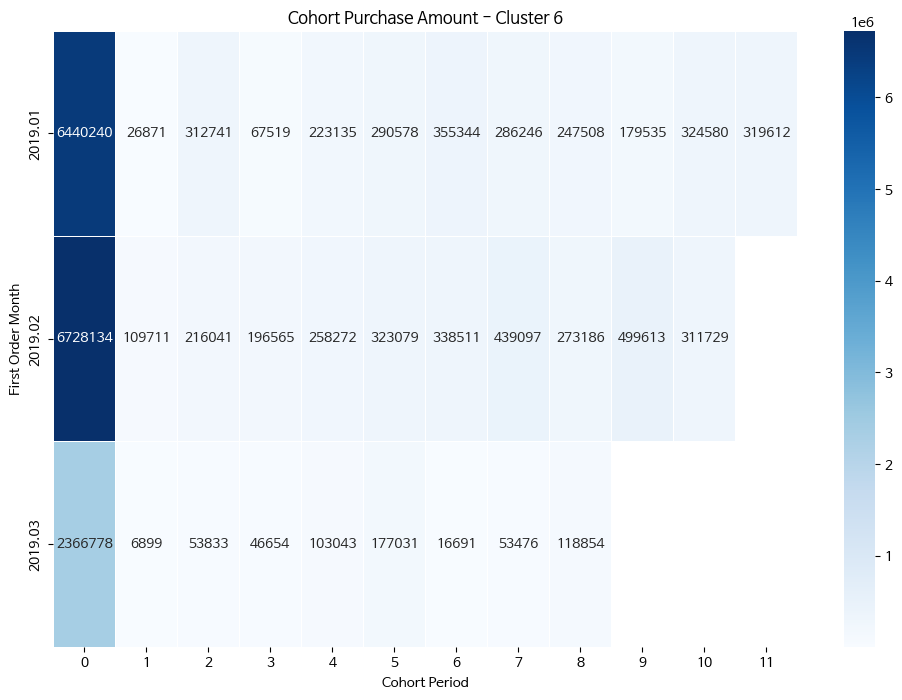

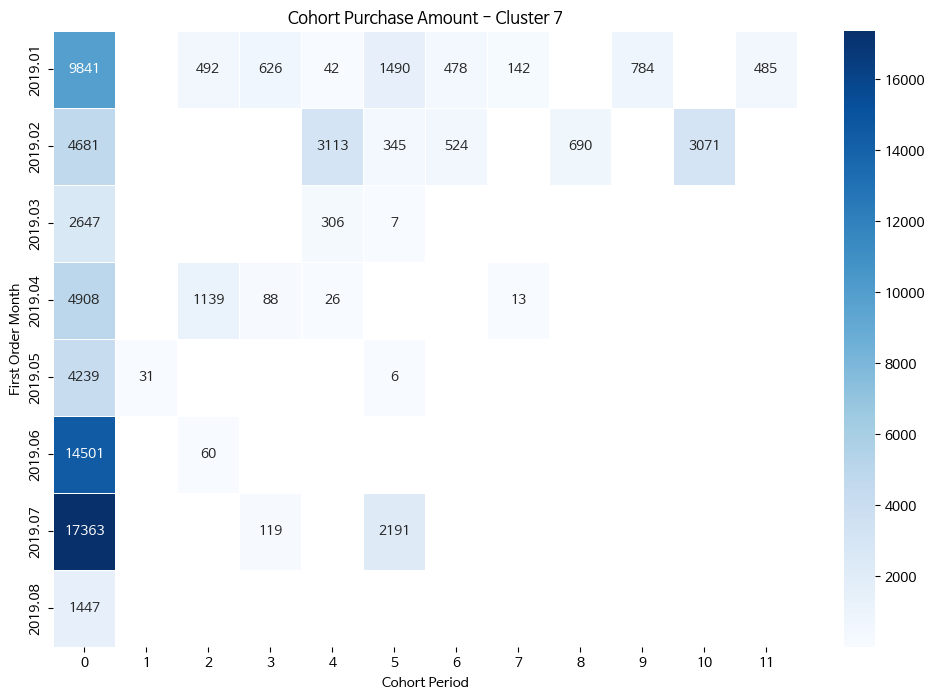

In [ ]:
def process_and_visualize_cluster_cohort(cluster_df, cluster_number):
    # 주기별 고객 수 계산
    co1 = cluster_df.groupby(['FirstOrder', 'OrderCycle']).고객ID.nunique().reset_index()
    co1.rename({'고객ID':'TotalUsers'}, axis=1, inplace=True)

    # 주기별 구매 금액 계산
    co2 = cluster_df.groupby(['FirstOrder', 'OrderCycle']).apply(lambda x: (x['평균금액'] * x['수량']).sum()).reset_index(name='PurchaseAmnt')

    # 데이터 병합
    co = co1.merge(co2, on=['FirstOrder', 'OrderCycle'])

    # Cohort Period 계산
    temp = []
    for i in range(co.shape[0]):
        f_first_order = pd.to_datetime(co.FirstOrder[i]).to_period('M')
        f_order_cycle = pd.to_datetime(co.OrderCycle[i]).to_period('M')
        month_diff = (f_order_cycle - f_first_order).n
        temp.append(month_diff)
    co['CohortPeriod'] = temp

    # 구매 규모 시각화
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rc('font', family='NanumBarunGothic')
    co_pivot = co.pivot_table(index='FirstOrder', columns='CohortPeriod', values='PurchaseAmnt', aggfunc='sum')
    sns.heatmap(co_pivot, cmap='Blues', annot=True, fmt='.0f', linewidths=0.5)
    plt.title(f'Cohort Purchase Amount - Cluster {cluster_number}')
    plt.xlabel('Cohort Period')
    plt.ylabel('First Order Month')
    plt.show()

# 각 클러스터에 대해 데이터 처리 및 시각화
for i in range(1, 8):
    cluster_df = globals()[f"Cluster{i}_df"]
    process_and_visualize_cluster_cohort(cluster_df, i)

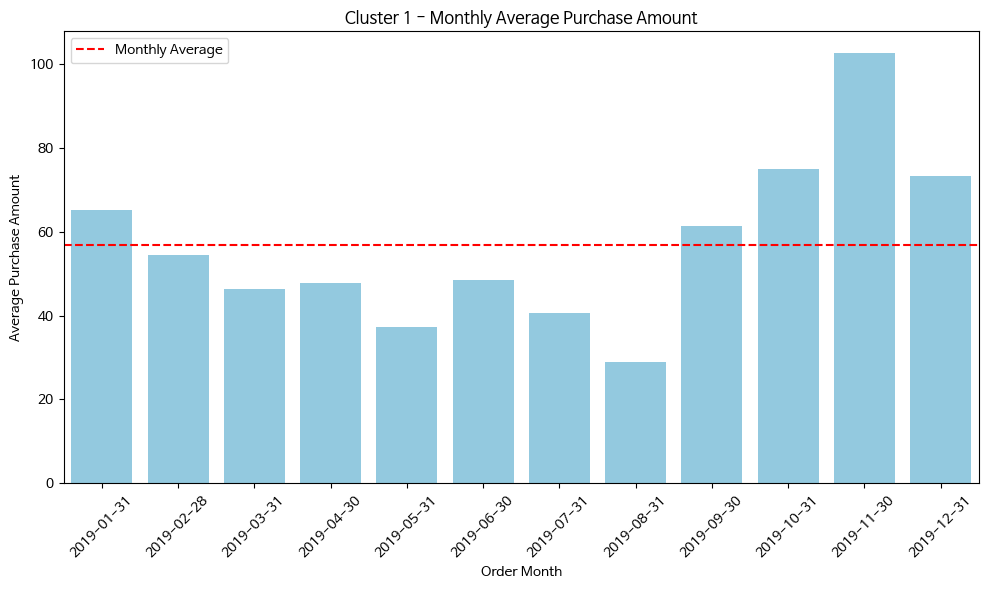

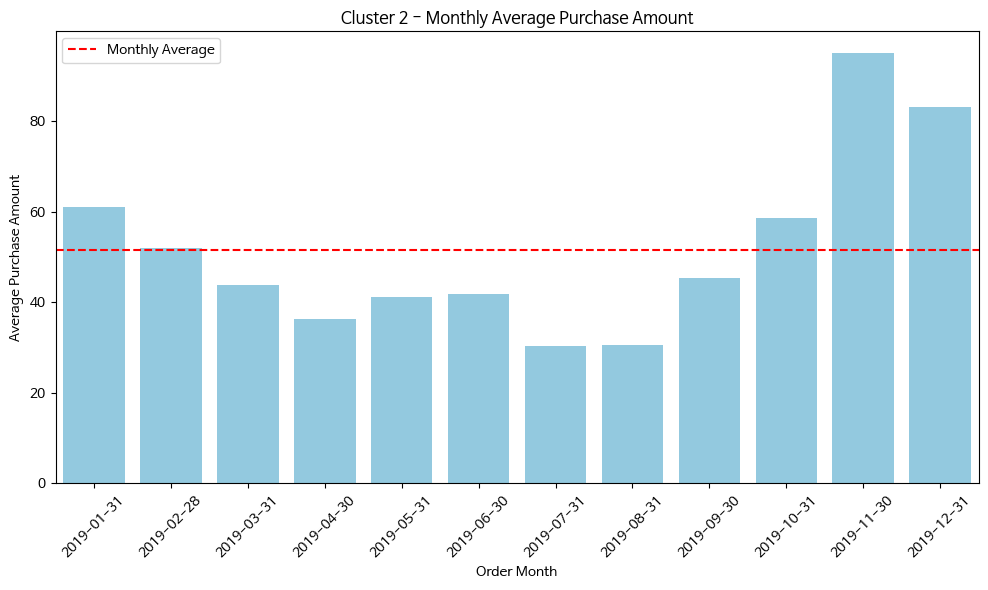

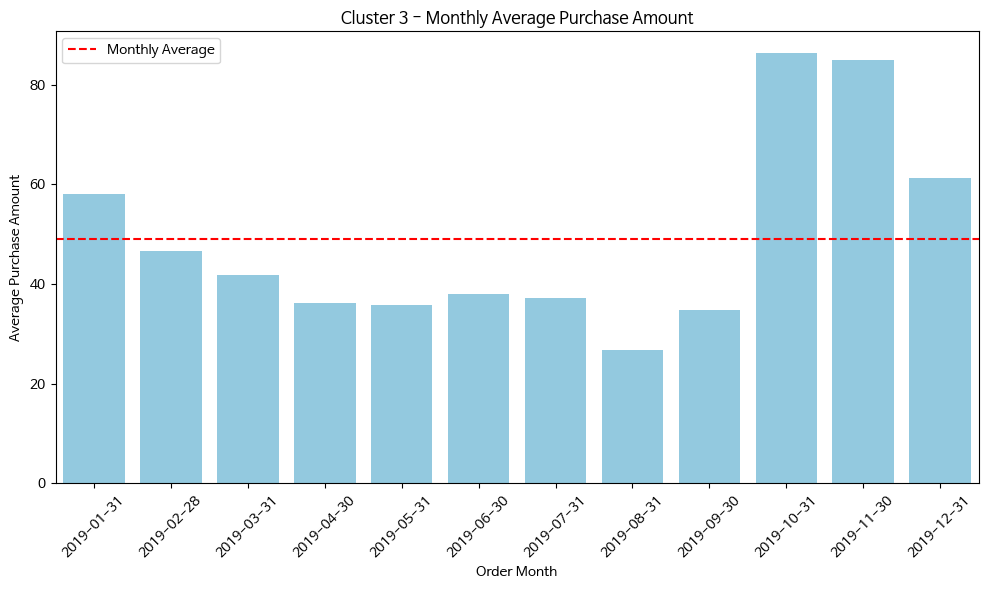

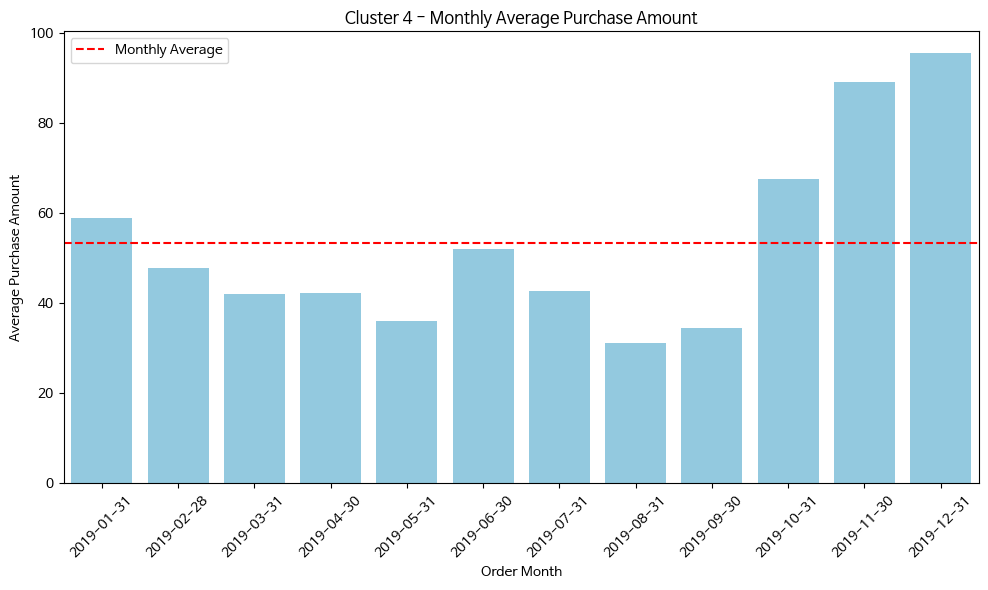

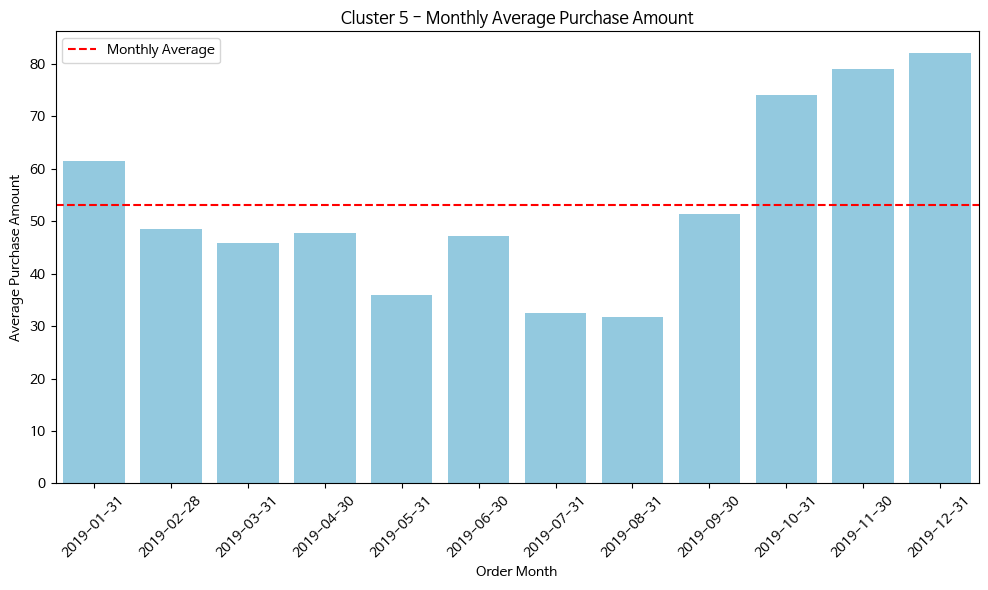

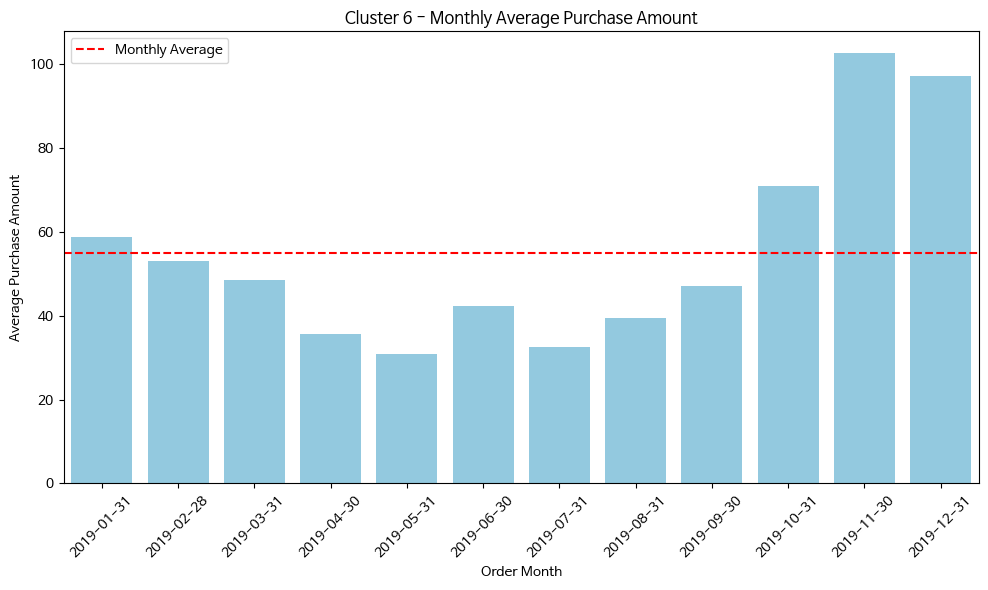

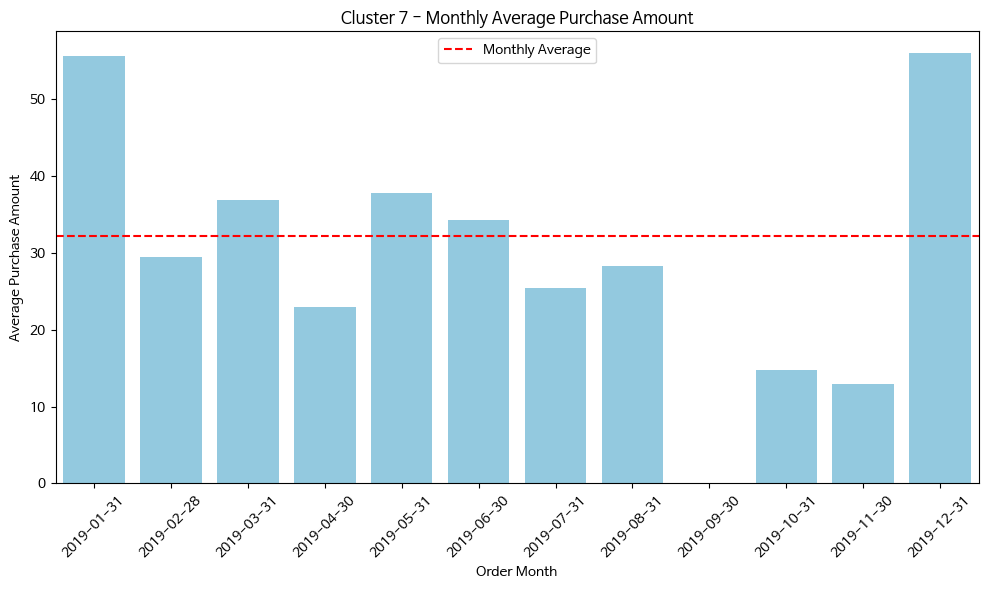

In [ ]:
def process_and_visualize_cluster_cohort(cluster_df, cluster_number):
    # OrderCycle 열을 날짜 형식으로 변환
    cluster_df['OrderCycle'] = pd.to_datetime(cluster_df['OrderCycle'])

    # 월별 평균 구매 금액 계산
    monthly_avg_purchase = cluster_df.groupby(pd.Grouper(key='OrderCycle', freq='M'))['평균금액'].mean().reset_index()

    # 시각화
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=monthly_avg_purchase, x='OrderCycle', y='평균금액', color='skyblue')
    plt.title(f'Cluster {cluster_number} - Monthly Average Purchase Amount')
    plt.xlabel('Order Month')
    plt.ylabel('Average Purchase Amount')
    plt.xticks(rotation=45)

    # 월별 평균을 기준선으로 그리기
    mean_purchase = monthly_avg_purchase['평균금액'].mean()
    ax.axhline(mean_purchase, color='red', linestyle='--', label='Monthly Average')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 각 클러스터에 대해 데이터 처리 및 시각화
for i in range(1, 8):
    cluster_df = globals()[f"Cluster{i}_df"]
    process_and_visualize_cluster_cohort(cluster_df, i)

#Cluster 특징 분석
#  Cluster 1 특징 분석
- 평균 가입 기간: 약 24.8개월
- 구매 패턴 분석:
    - 평균 구매 수량: 4.34개
    - 평균 구매 금액: $51.45
- 충성도 분석:
    - 평균 구매 횟수: 1947회
- 쿠폰 사용량이 평균 이상


---


# Cluster 2 특징 분석
- 평균 가입 기간: 약 26.5개월
- 구매 패턴 분석:
    - 평균 구매 수량: 4.13개
    - 평균 구매 금액: $51.85
- 충성도 분석:
    - 평균 구매 횟수: 775회
- 쿠폰 사용량이 평균 이상



---


# Cluster 3 특징 분석
 - 평균 가입 기간: 약 26.1개월
- 구매 패턴 분석:
    - 평균 구매 수량: 4.00개
    - 평균 구매 금액: $47.61
 - 충성도 분석:
    - 평균 구매 횟수: 130회
- 쿠폰 사용량이 평균 이하



---


# Cluster 4 특징 분석
- 평균 가입 기간: 약 26.9개월
- 구매 패턴 분석:
    - 평균 구매 수량: 4.29개
    - 평균 구매 금액: $49.29
- 충성도 분석:
    - 평균 구매 횟수: 1466회
- 쿠폰 사용량이 평균 이상



---


# Cluster 5 특징 분석

  - 평균 가입 기간: 약 25.6개월
  - 구매 패턴 분석:
    - 평균 구매 수량: 4.13개
    - 평균 구매 금액: $49.01
  - 충성도 분석:
    - 평균 구매 횟수: 1403회
  - 쿠폰 사용량이 평균 이상


---


# Cluster 6 특징 분석

  - 평균 가입 기간: 약 27.0개월
  - 구매 패턴 분석:
    - 평균 구매 수량: 4.42개
    - 평균 구매 금액: $53.87
  - 충성도 분석:
    - 평균 구매 횟수: 2721회
  - 쿠폰 사용량이 평균 이상


---


# Cluster 7 특징 분석

  - 평균 가입 기간: 약 25.5개월
  - 구매 패턴 분석:
    - 평균 구매 수량: 3.60개
    - 평균 구매 금액: $34.99
  - 충성도 분석:
    - 평균 구매 횟수: 15회
  - 쿠폰 사용량이 평균 이하
  - 매우 낮은 충성도를 보임

# 클러스터별 그룹 소개와 맞춤 솔루션

## VIP 그룹 (Cluster 6)
- **그룹 소개:** 이 그룹은 가장 높은 구매량과 금액을 보이며, 오래된 고객들이 속해 있어 VIP로 분류합니다.
- **솔루션:**
  - VIP 고객을 대상으로 하는 특별한 혜택 및 프로모션 제공
  - 개별화된 서비스 제공 : VIP 특별 이벤트, 선착순 구매, 제품 체험 등을 제공하여 충성도를 유지


---


## 할인 애호가 그룹 (Cluster 2, 4, 5)
- **그룹 소개:** 이 그룹은 평균적인 구매량과 금액을 보이지만 쿠폰 사용량이 평균 이상인 고객들로, 할인에 민감한 고객 그룹입니다.
- **솔루션:**
  - 번들 상품 및 세트상품 할인으로 추가 구매 유도
  - 선제적인 쿠폰 제공


---


## 이탈위험 그룹 (Cluster 1, 3)
- **그룹 소개:** 이 그룹은 구매량과 금액이 평균 이하이며, 쿠폰 사용량도 평균 이하인 일반적인 고객 그룹이며, 이탈이 예상되는 그룹입니다.
- **솔루션:**
  - 이탈 예방을 위해 푸시 알림 발송
  - 이탈 원인을 파악할 수 있는 설문 진행하여, 배송 문제나 상품 퀄리티를 개선합니다


---


## 이탈그룹 (Cluster 7)
- **그룹 소개:** 이 그룹은 구매량과 금액이 매우 낮으며, 쿠폰 사용량도 평균 이하이며 충성도가 매우 낮아 이탈고객 그룹으로 분류합니다.
- **솔루션:**
  - 휴면 회원을 위한 프로모션 진행 : 웰컴백 혜택 제공